In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd

#datasetleri yüklüyoruz
df_train=pd.read_csv("/content/drive/MyDrive/kolektif_2/turkish-sentiment/train.csv",index_col=[0],encoding="windows-1252")
df_test=pd.read_csv("/content/drive/MyDrive/kolektif_2/turkish-sentiment/test.csv",index_col=[0],encoding="windows-1252")
#df_test = pd.read_csv("/content/drive/MyDrive/kolektif_2/dataset/magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")
#df_test = pd.read_csv("/content/drive/MyDrive/kolektif_2/train.csv",index_col=[0],encoding="windows-1252")

import torch
# cuda varsa gpu yoksa cpu kullanmak için cihazı ayarlayan kod hücresi
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

#test veri seti için zero-shot a sokulmak üzere metin ve etiketlerin alınması ardından ilk 1000inin alınması
comments = df_test.comment.values

labels_test = df_test.Label.values

comments = comments[:1000]
labels_test = labels_test[:1000]

No GPU available, using the CPU instead.


In [5]:
files = [
    "/content/drive/MyDrive/prediction_dict_bert-base-turkish-cased_etiket1.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-medium-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-mini-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-small-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/prediction_dict_etiket2.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-medium-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-mini-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/prediction_dict_turkish-small-bert-uncased_etiket2.pickle"
]


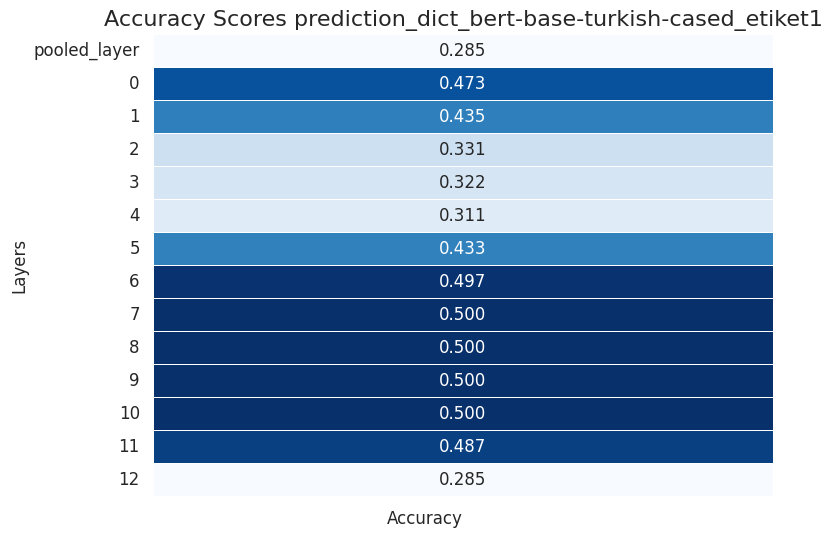

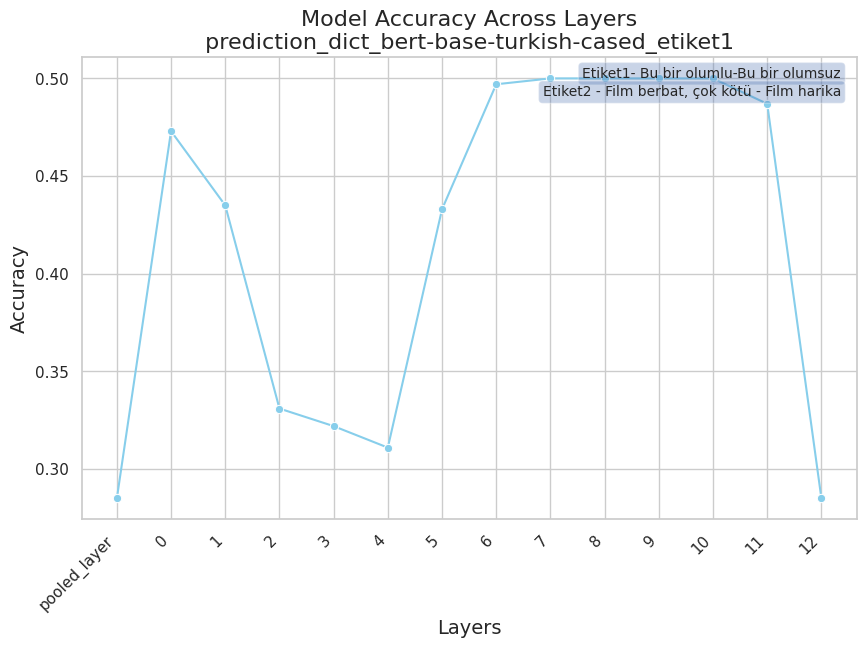

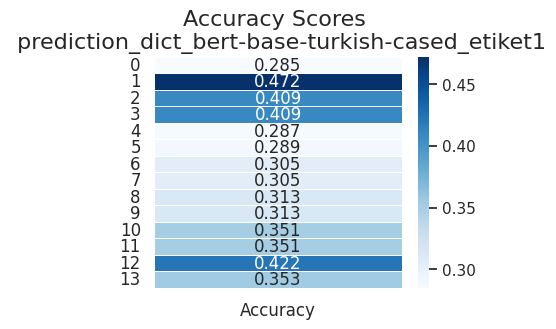

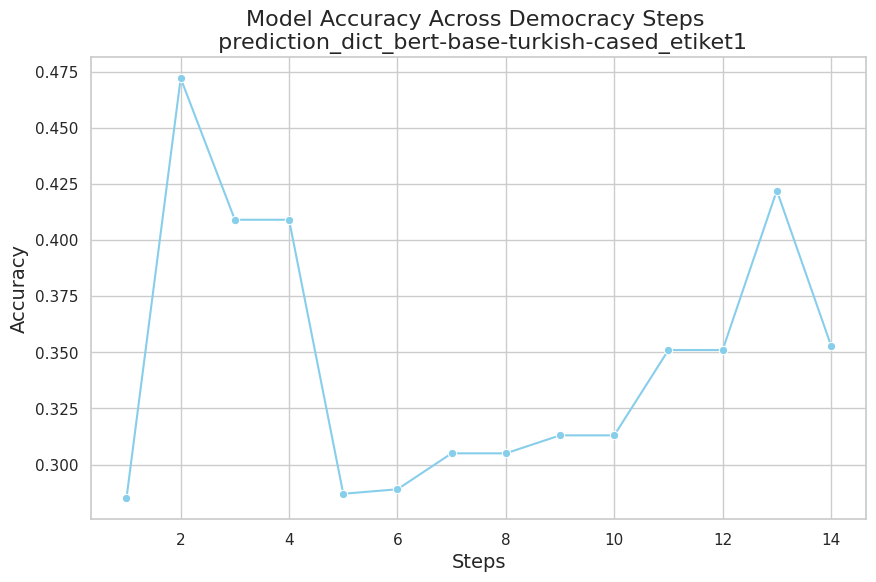

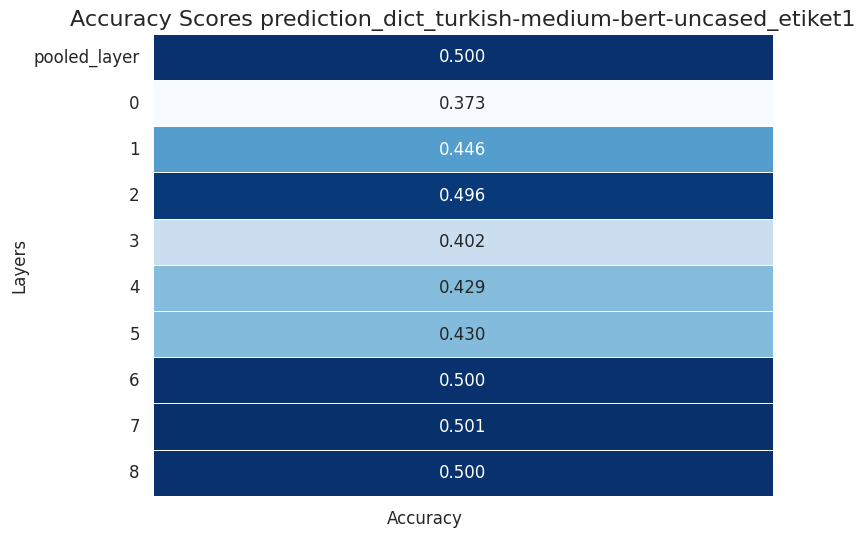

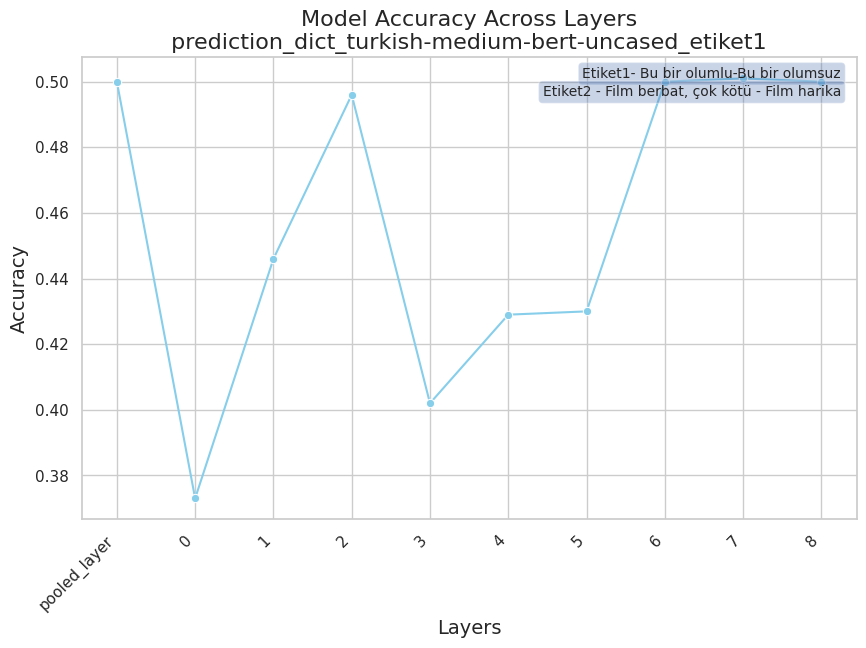

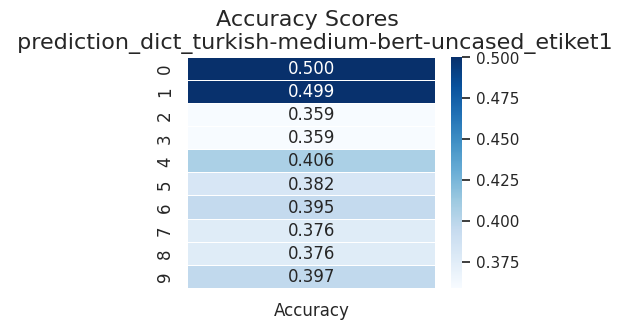

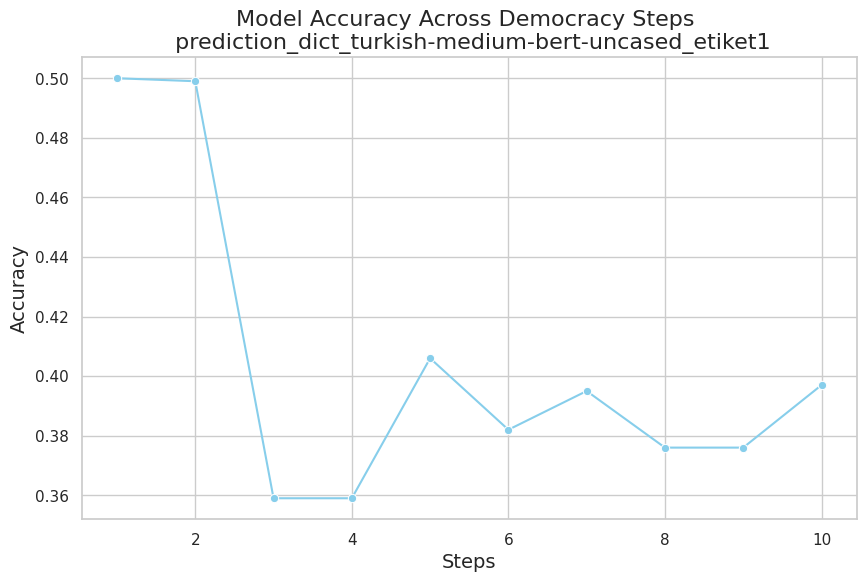

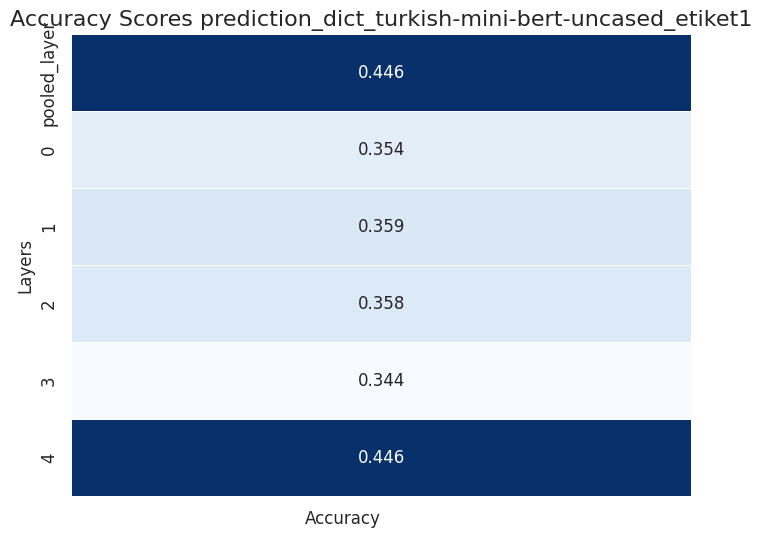

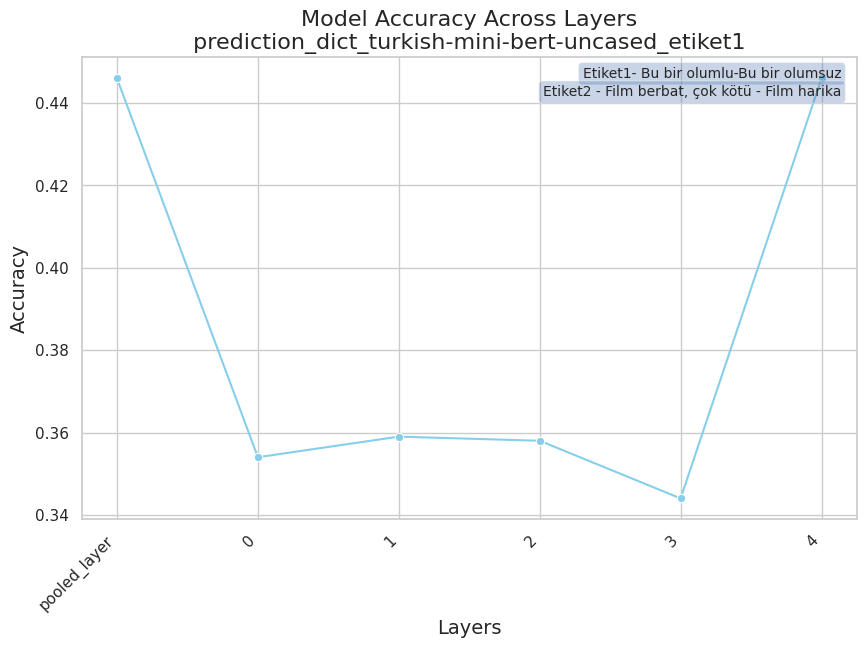

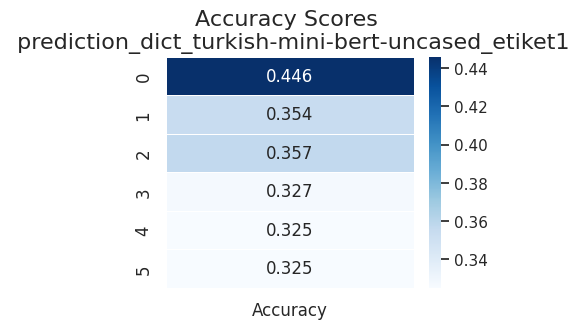

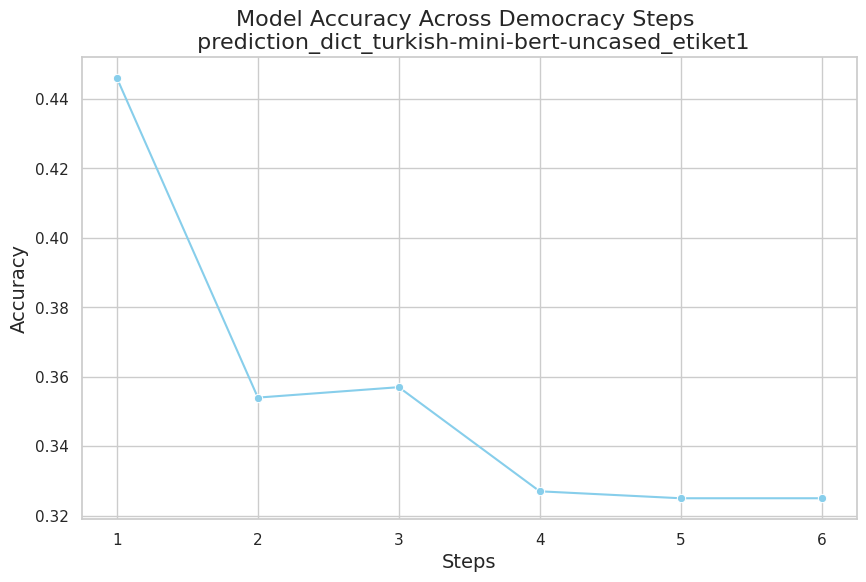

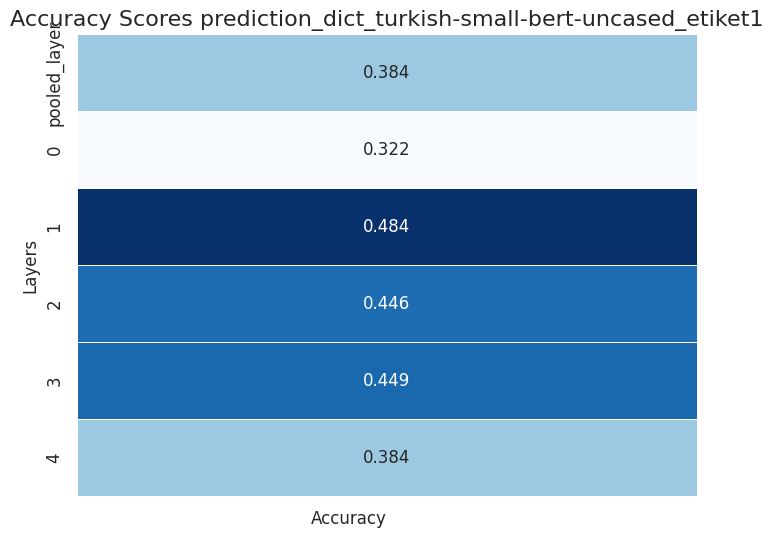

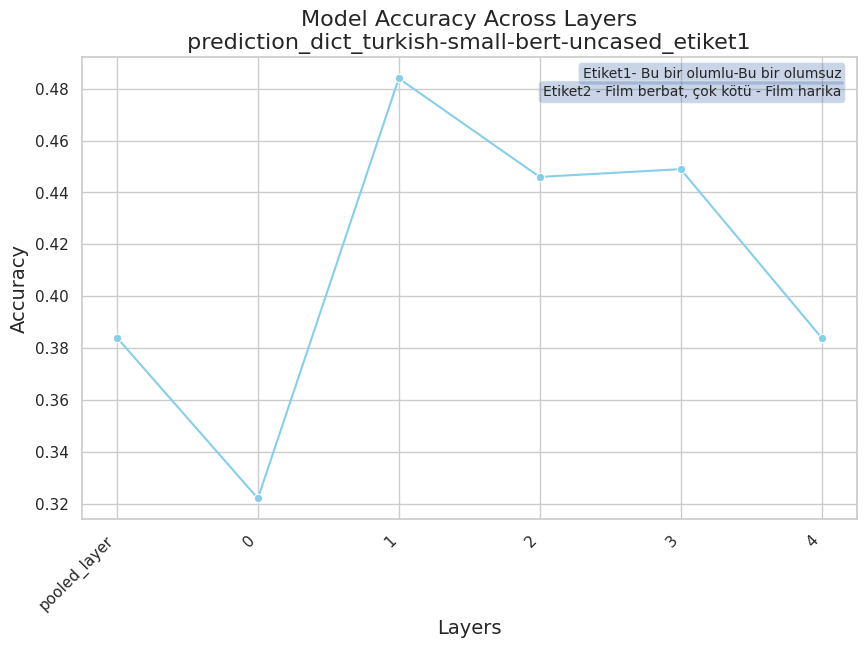

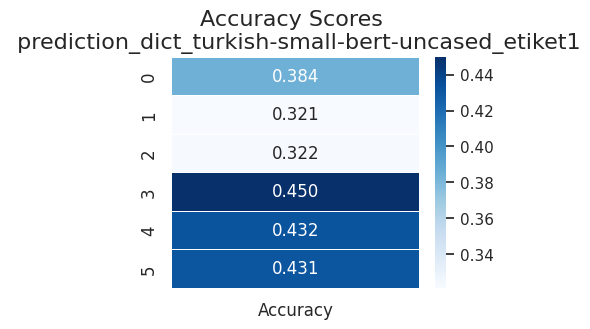

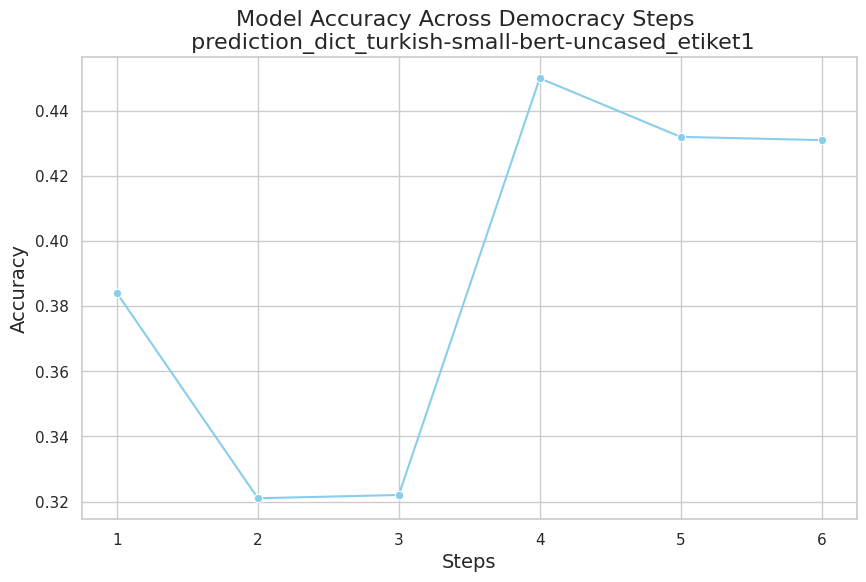

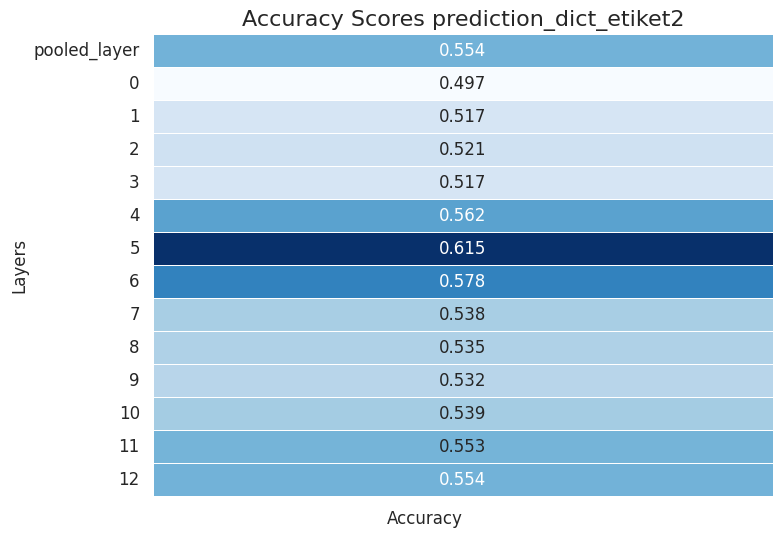

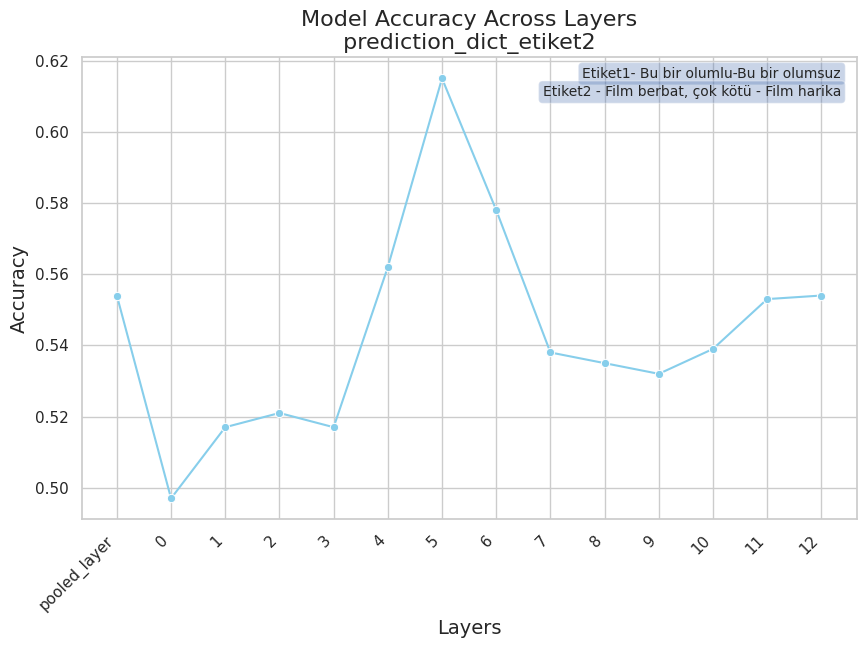

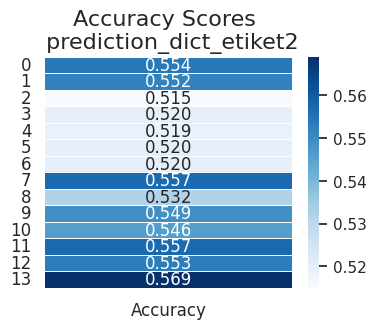

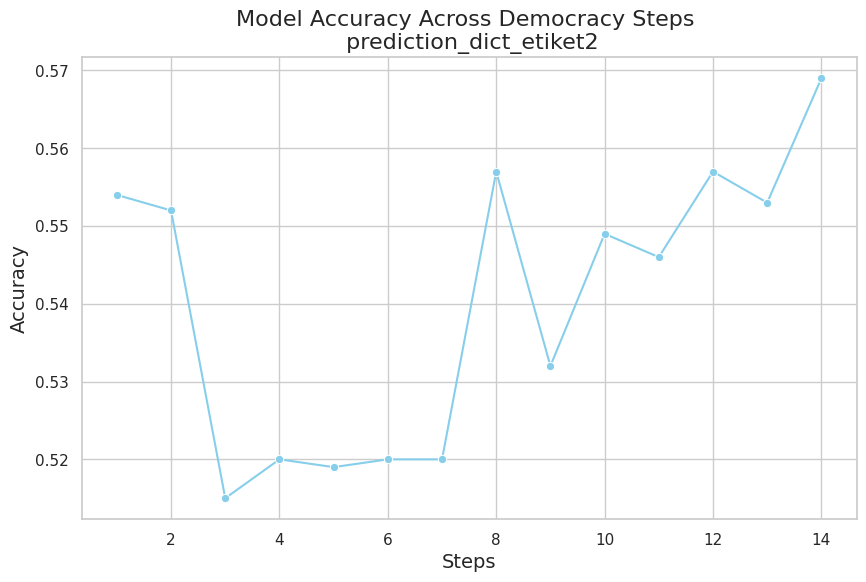

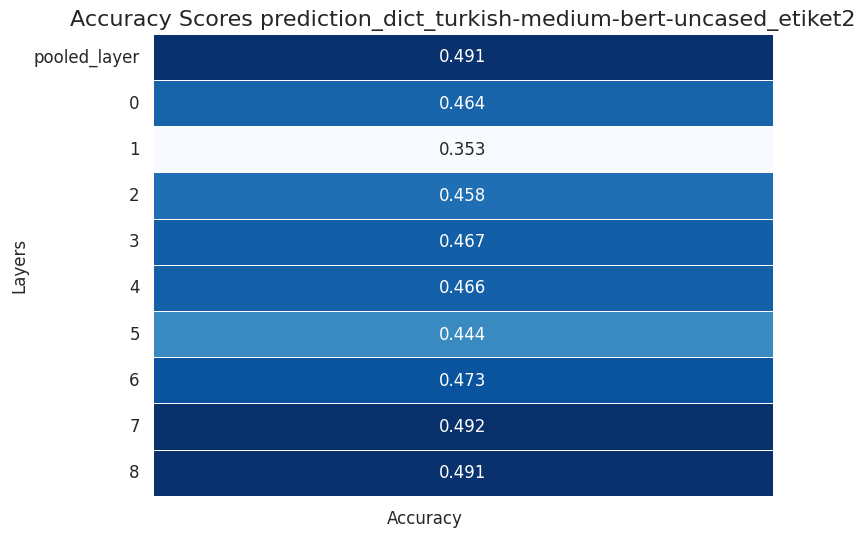

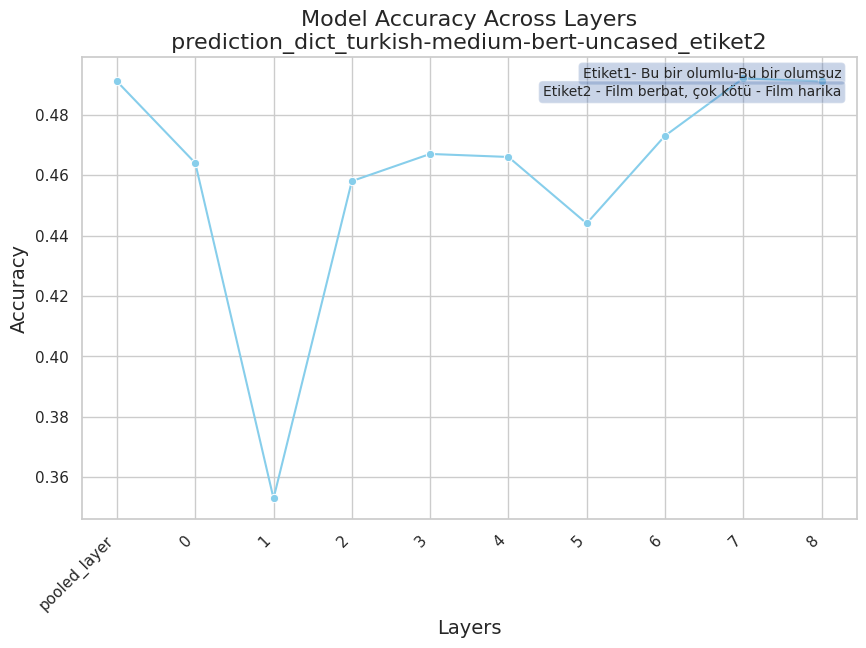

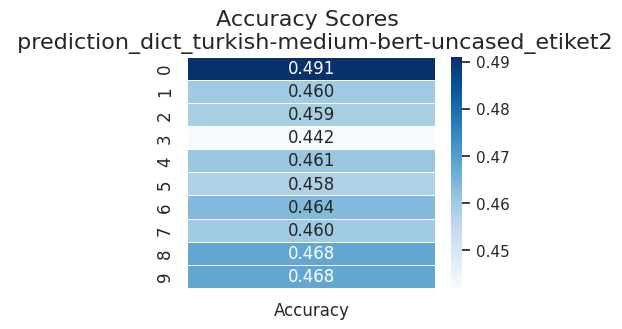

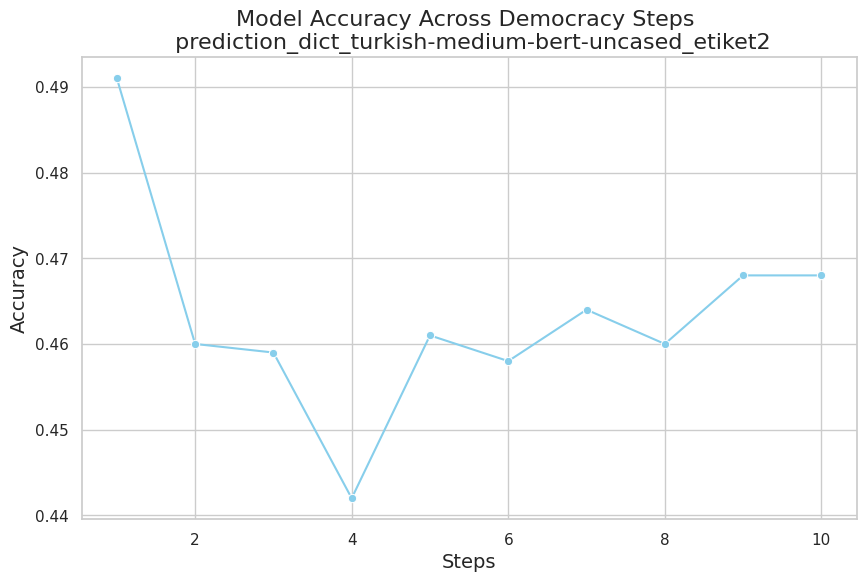

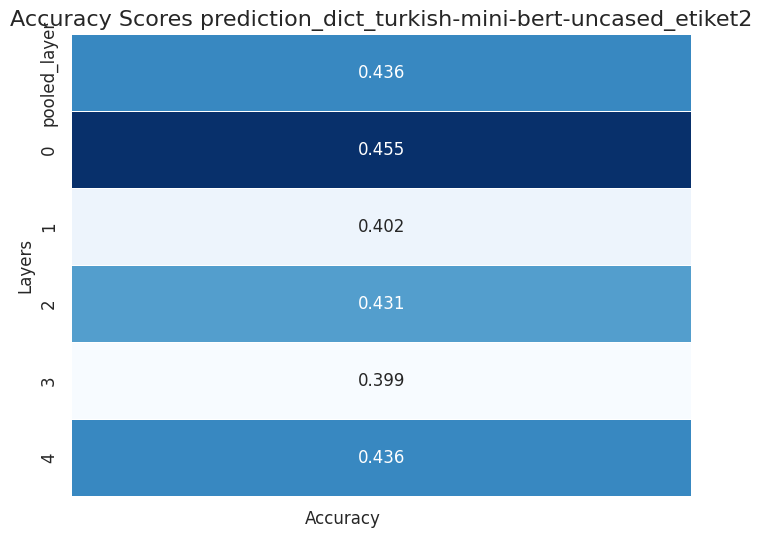

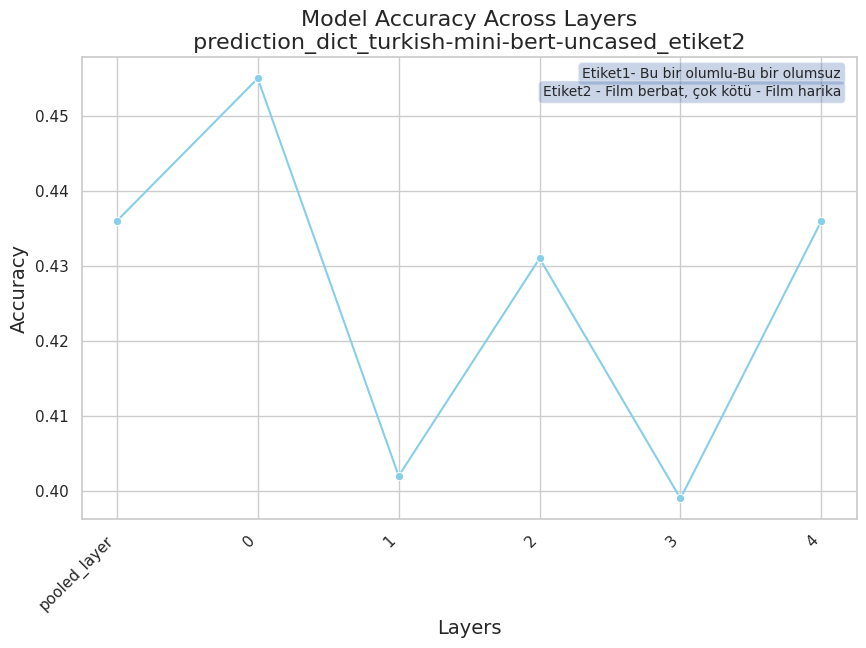

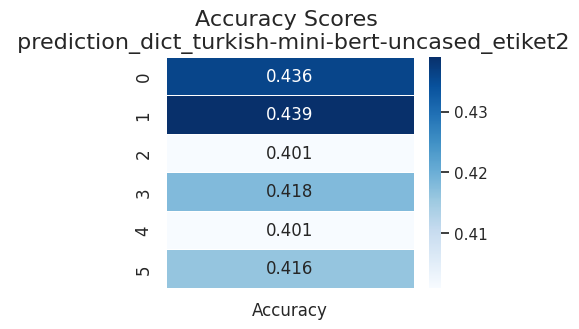

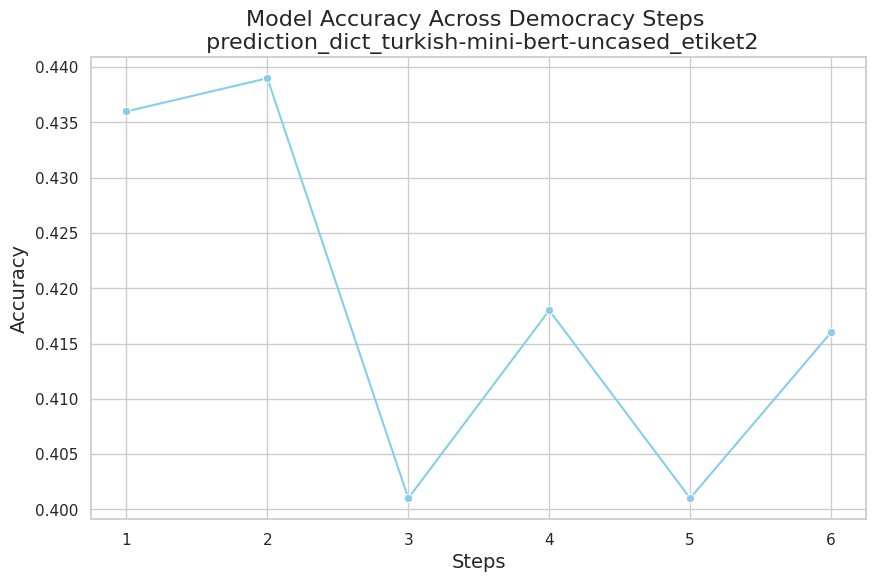

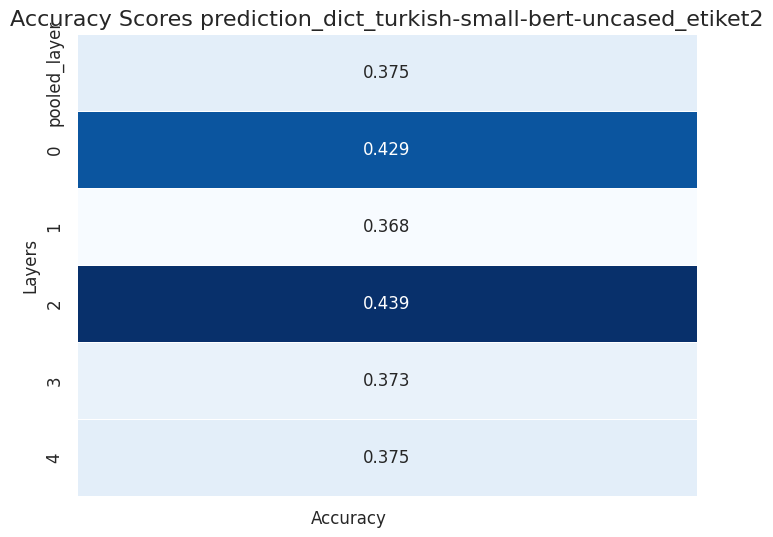

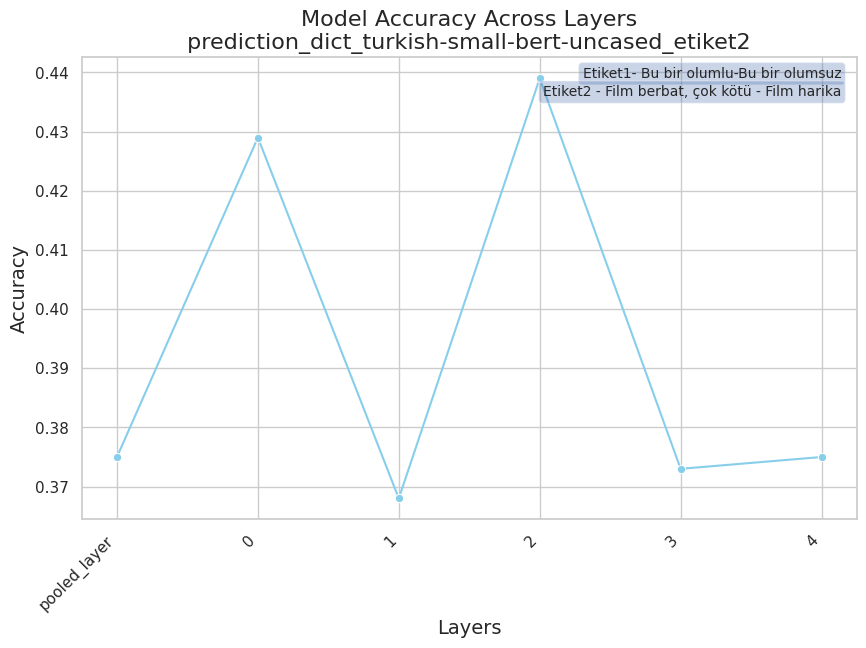

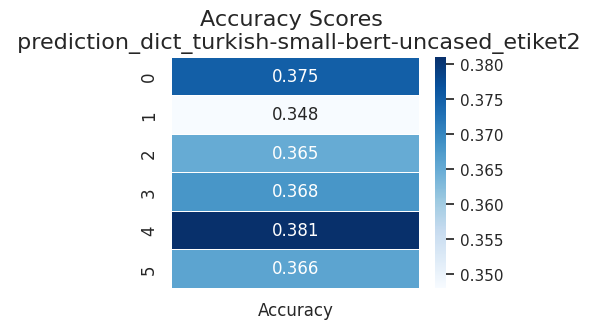

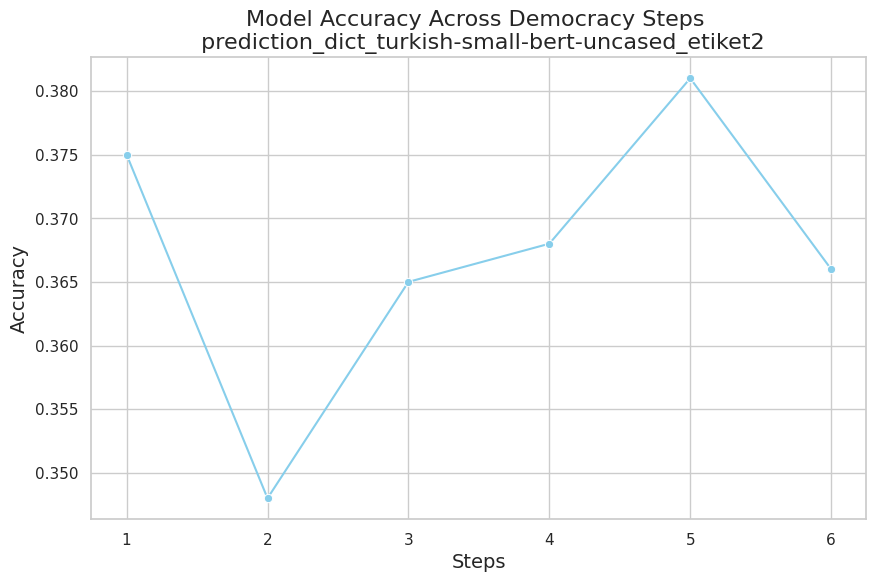

In [6]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


for file in files:
    with open(file, 'rb') as f:
        film_predict  = pickle.load(f)

    file_name = file.split("/")[-1].split(".")[0]


    model_predicts=  {}
    accuracy_list= []
    for name, predict_list in film_predict.items():
        accuracy_score_1 =accuracy_score(labels_test, predict_list)
        accuracy_list.append(accuracy_score_1)
        #print(f"Accuracy of BERT ({name}) is:",accuracy_score_1)

        from sklearn.metrics import classification_report
        #print(classification_report(labels_test, predict_list))
        model_predicts[name] = accuracy_score_1


    df = pd.DataFrame(list(model_predicts.items()), columns=['Layers', 'Accuracy'])

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.set_index('Layers'), annot=True, cmap='Blues', cbar=False, linewidths=.5,  fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores {file_name}', fontsize=16)
    plt.xticks(ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Extract keys (x-axis) and values (y-axis) from the dictionary
    steps = list(model_predicts.keys())
    accuracy = list(model_predicts.values())

    steps = [str(step) for step in steps]
    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Layers\n {file_name} ', fontsize=16)
    line_plot.set_xlabel('Layers', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Two labels inside the graph at the top-right corner
    note1 = 'Etiket1- Bu bir olumlu-Bu bir olumsuz'
    note2 = 'Etiket2 - Film berbat, çok kötü - Film harika'
    plt.text(0.98, 0.98, note1, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))
    plt.text(0.98, 0.94, note2, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))


    # Display the plot
    plt.show()


    predict_model_list = []
    accuracy_score_democracy= []
    for i in film_predict.values():
        predict_model_list.append(i)
        import scipy.stats
        result = scipy.stats.mode(np.stack(predict_model_list), axis=0)
        e_result=result.mode
        from sklearn.metrics import accuracy_score
        acc = accuracy_score(labels_test, e_result)
        accuracy_score_democracy.append(acc)
        #print("Accuracy of BERT(Bagging with Democracy method) is:",acc)

        from sklearn.metrics import classification_report
        #print(classification_report(labels_test, e_result))


    # Convert the list into a DataFrame
    df = pd.DataFrame({'Accuracy': accuracy_score_democracy})

    plt.figure(figsize=(4, 3))
    sns.heatmap(df, annot=True, cmap='Blues', cbar=True, linewidths=.5,  fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores \n {file_name}', fontsize=16)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Create a list for steps based on the length of the accuracy list
    steps = list(range(1, len(accuracy_score_democracy) + 1))

    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy_score_democracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Democracy Steps \n {file_name}', fontsize=16)
    line_plot.set_xlabel('Steps', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Display the plot
    plt.show()




In [7]:
import numpy as np
import pandas as pd

#datasetleri yüklüyoruz
df_test=pd.read_excel("/content/drive/MyDrive/kolektif_proje/TurkishTweets.xlsx")


encoded_labels = {'kızgın': 0, 'korku': 1}
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['Etiket'] = label_encoder.fit_transform(df_test['Etiket'])

import torch
# cuda varsa gpu yoksa cpu kullanmak için cihazı ayarlayan kod hücresi
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

#test veri seti için zero-shot a sokulmak üzere metin ve etiketlerin alınması ardından ilk 1000inin alınması
comments = df_test.Tweet.values

labels_test = df_test.Etiket.values

comments = comments[:1000]
labels_test = labels_test[:1000]

No GPU available, using the CPU instead.


In [8]:
files = [
    "/content/drive/MyDrive/tweet_prediction_dict.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_etiket_2.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-medium-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-medium-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-mini-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-mini-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-small-bert-uncased_etiket1.pickle",
    "/content/drive/MyDrive/tweet_prediction_dict_turkish-small-bert-uncased_etiket2.pickle"
]

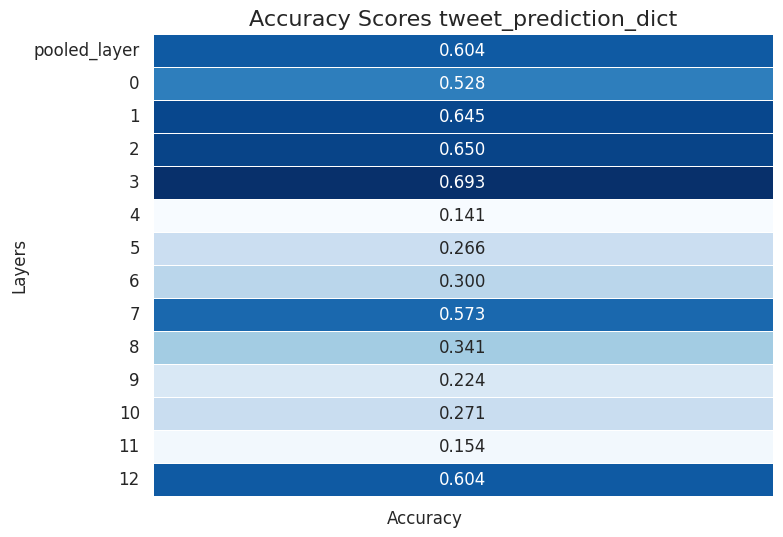

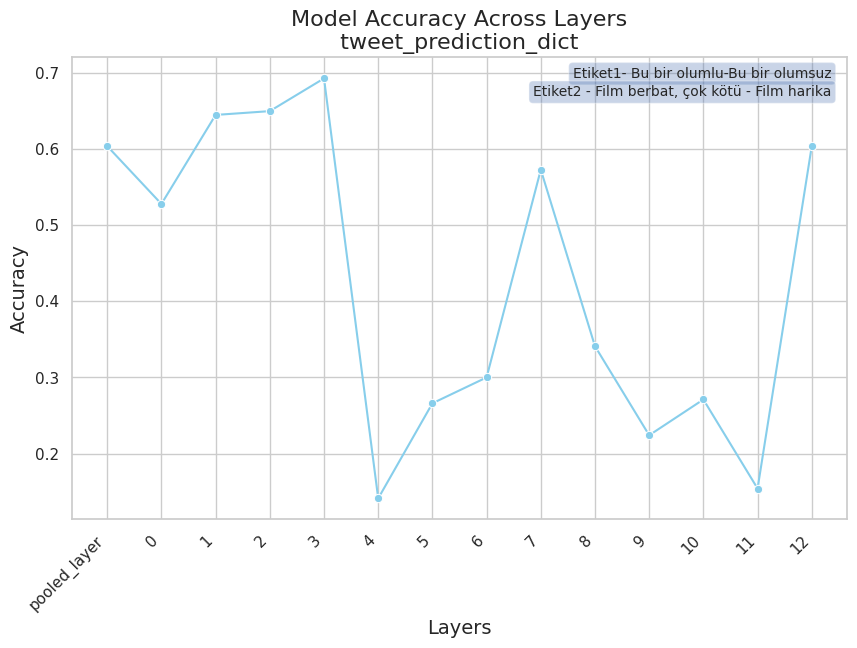

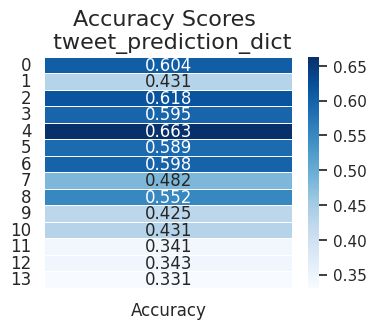

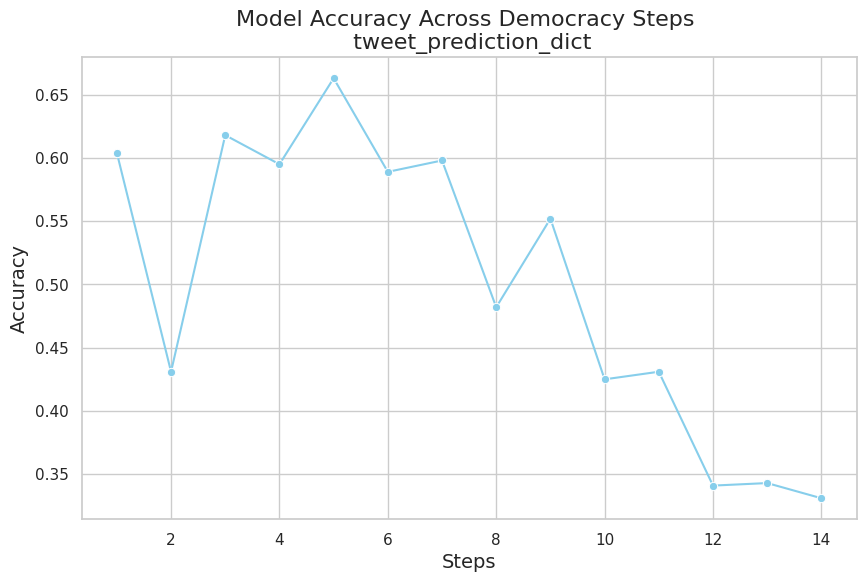

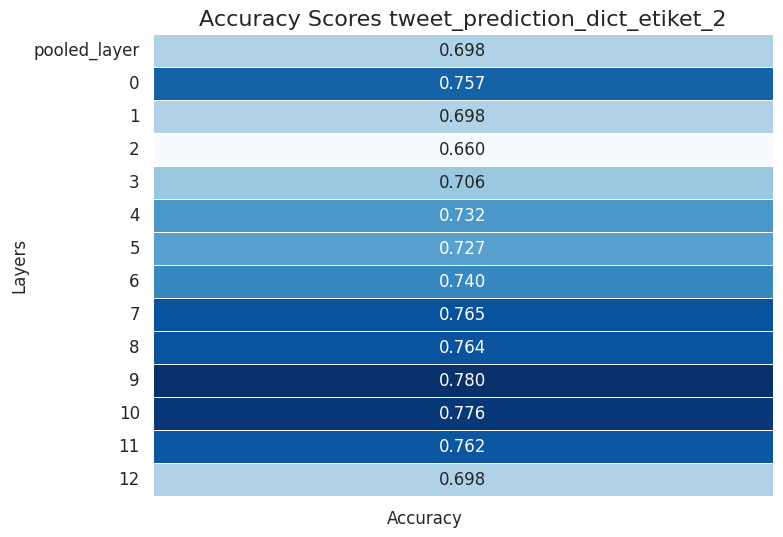

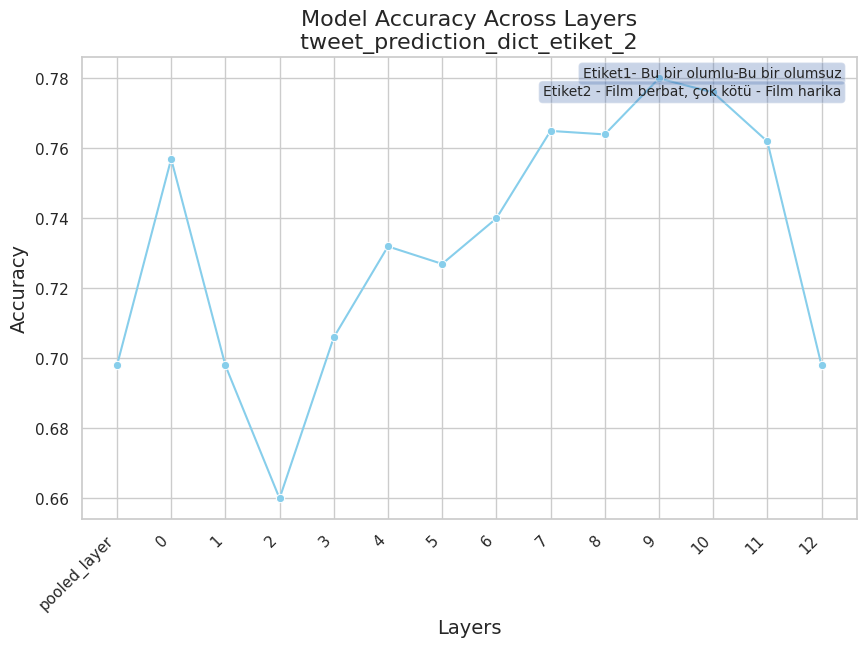

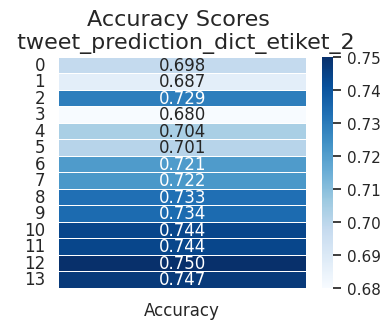

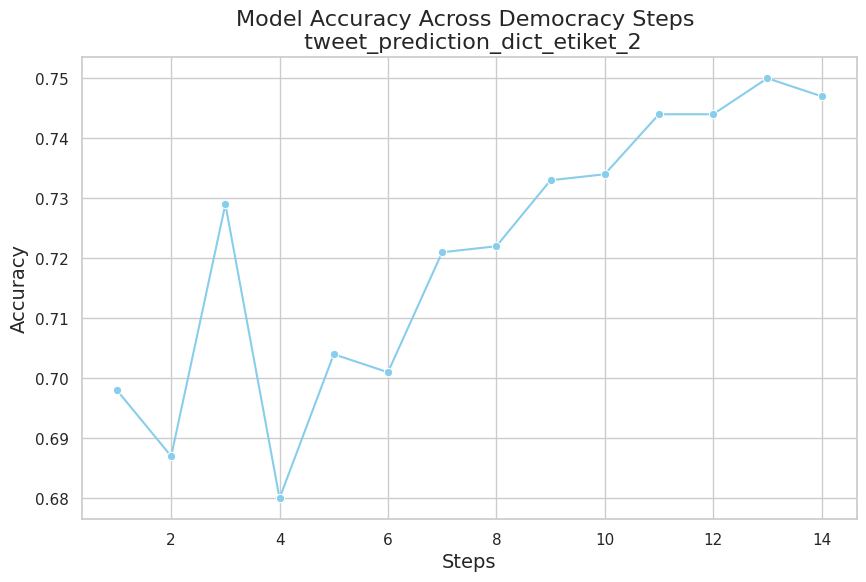

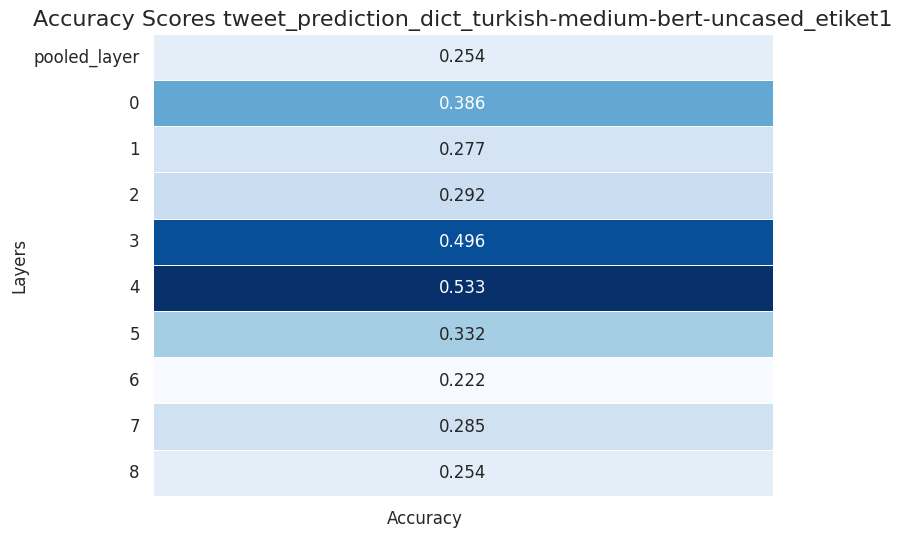

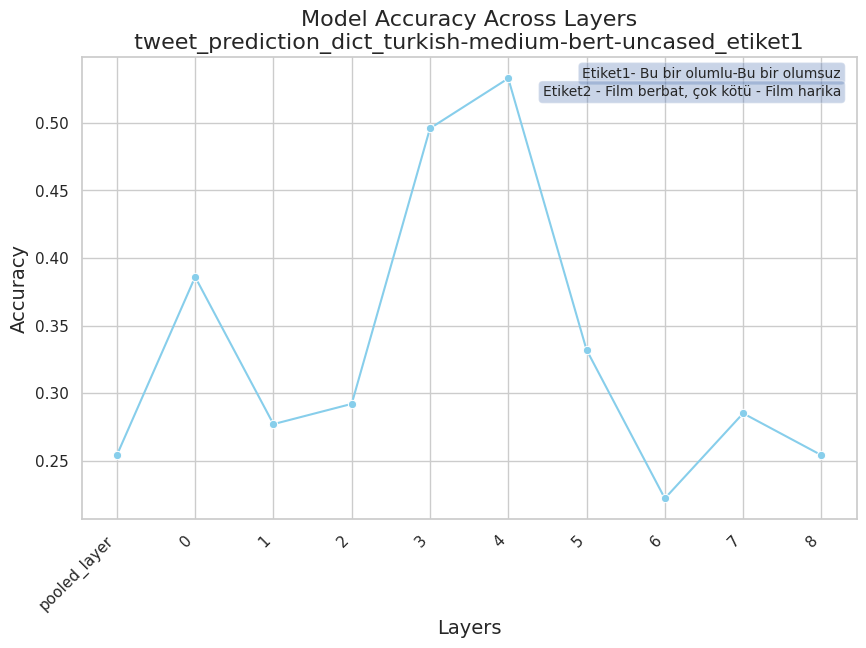

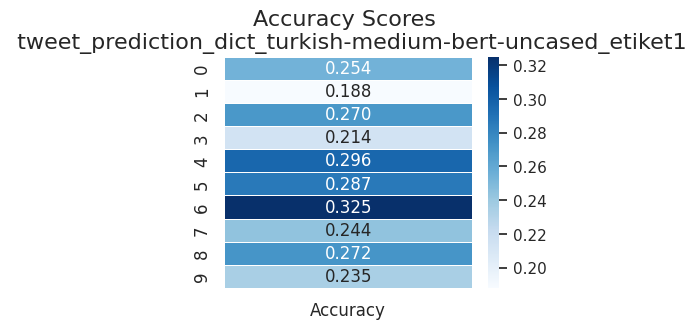

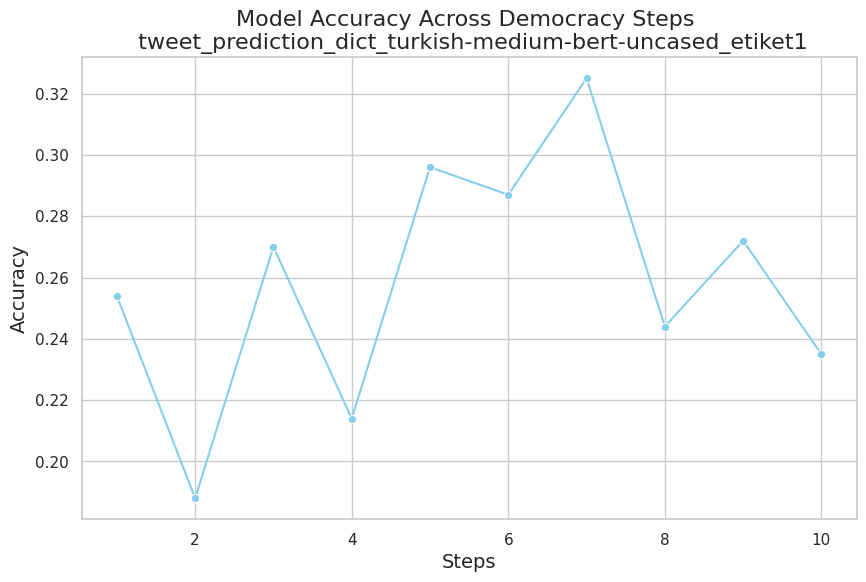

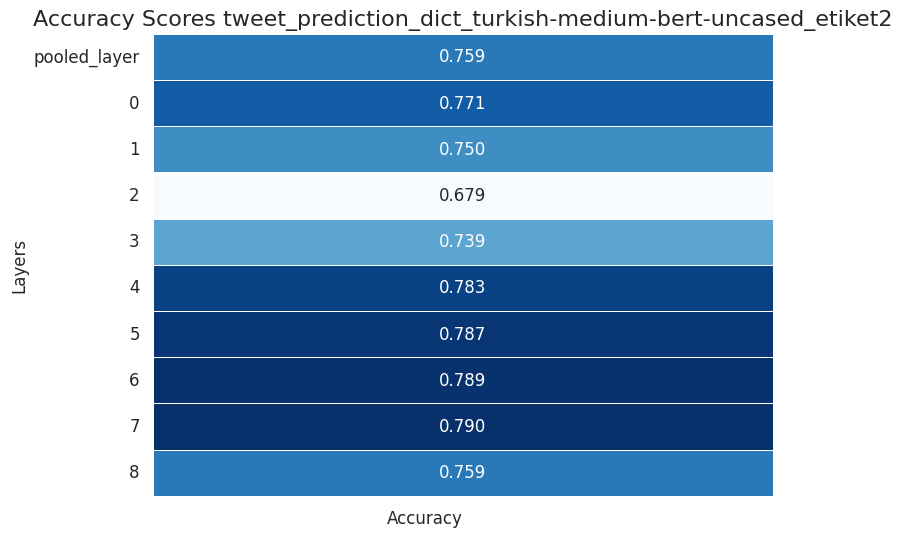

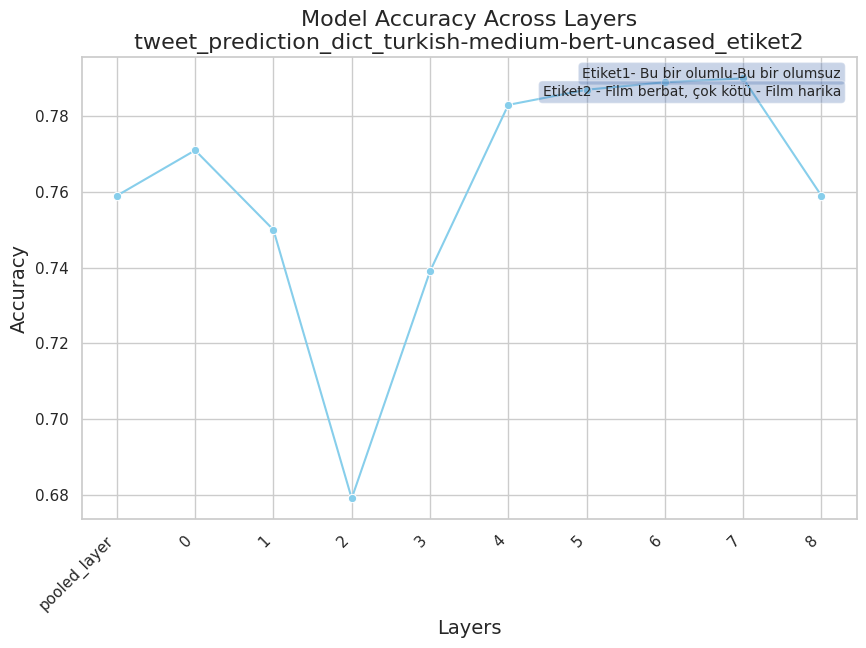

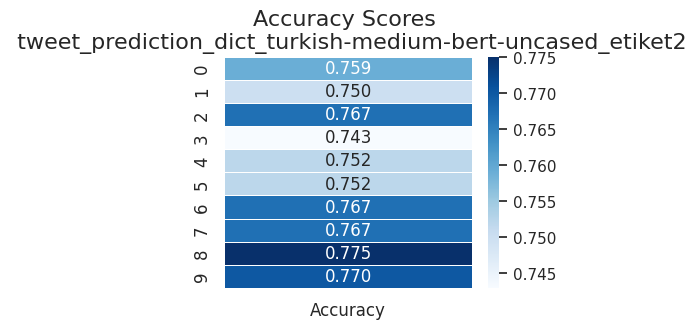

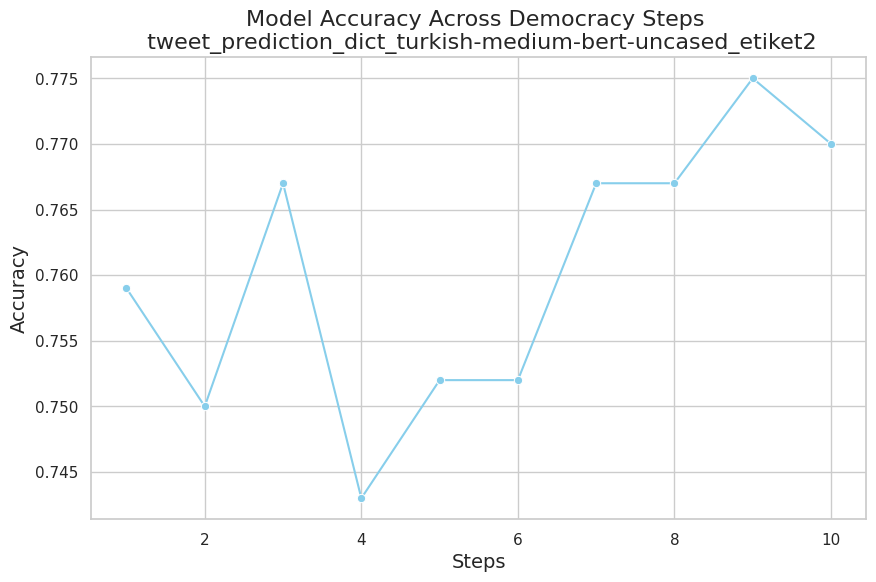

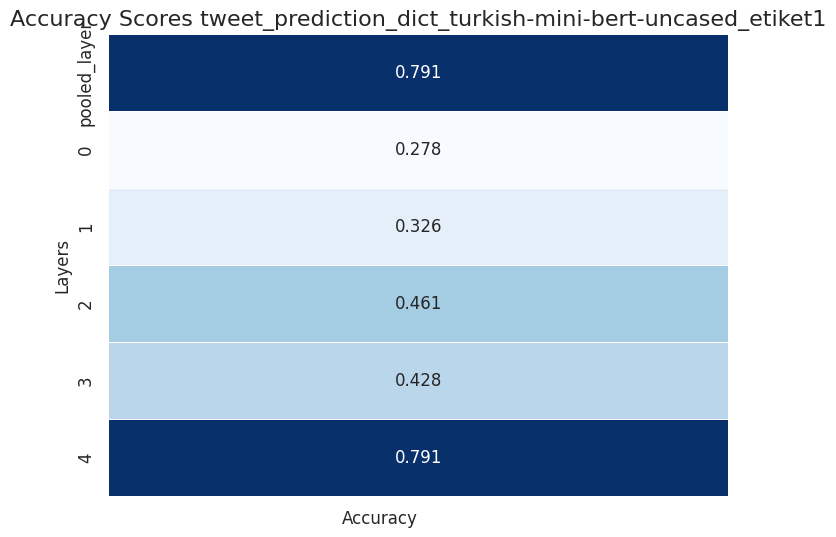

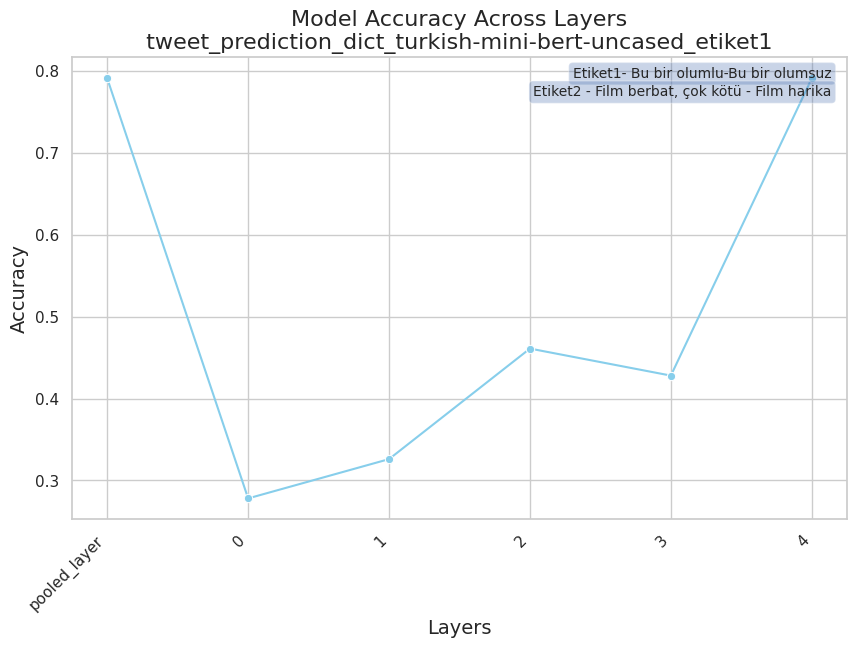

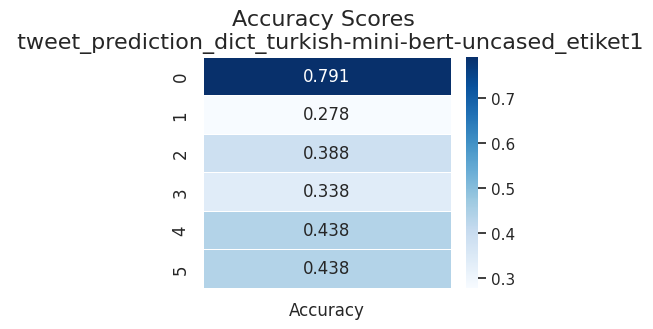

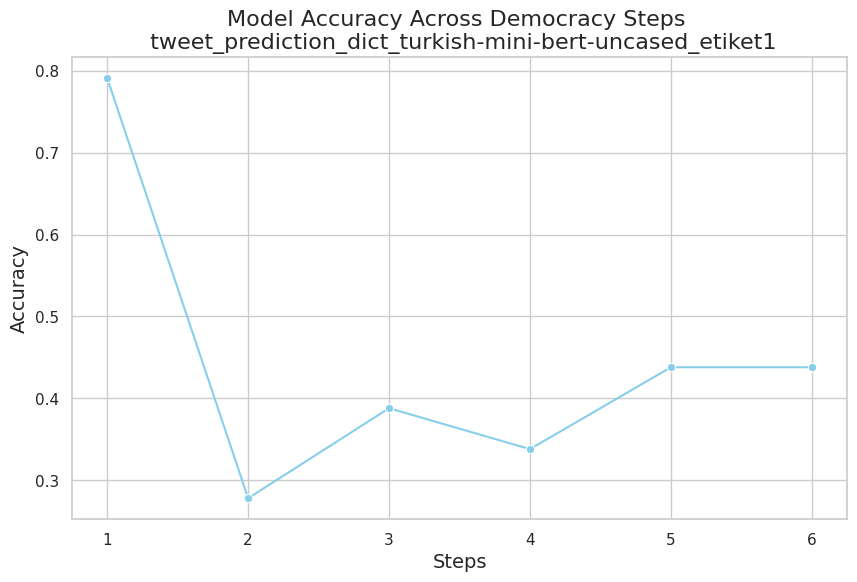

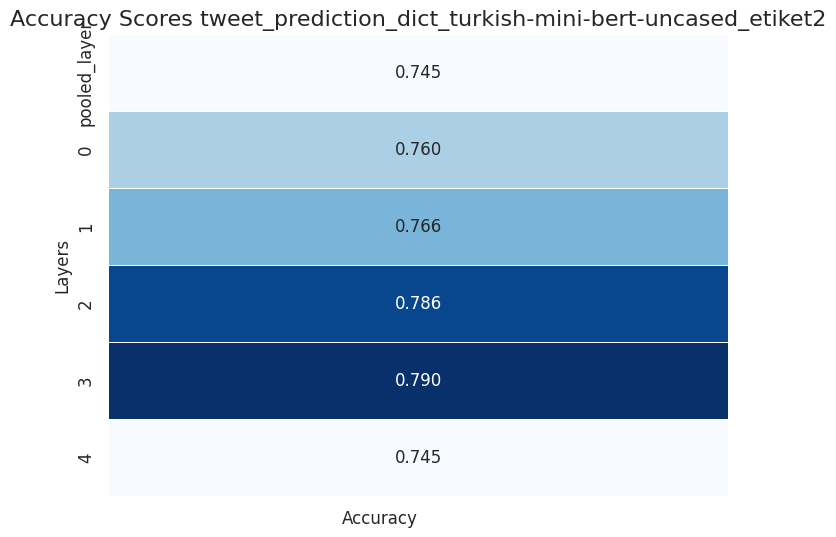

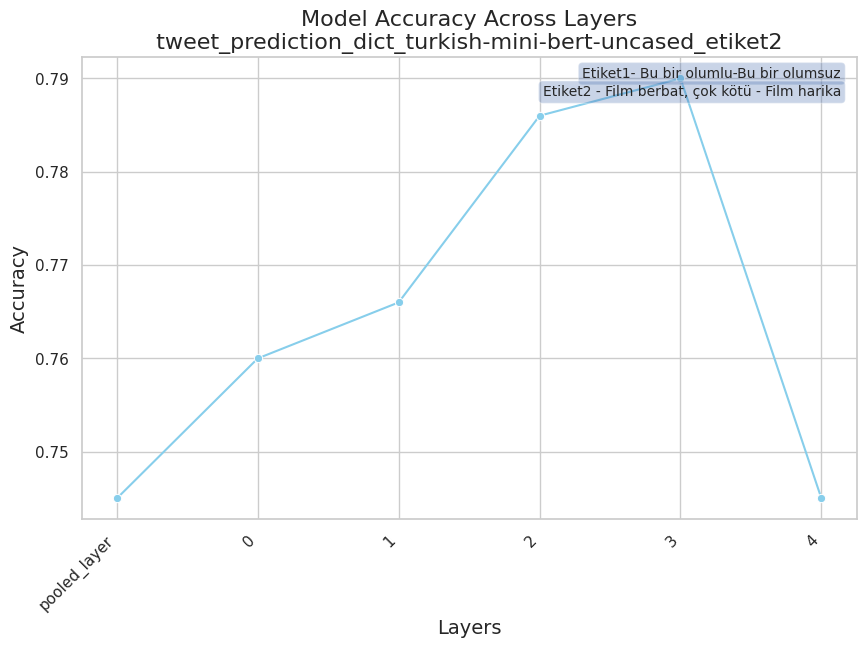

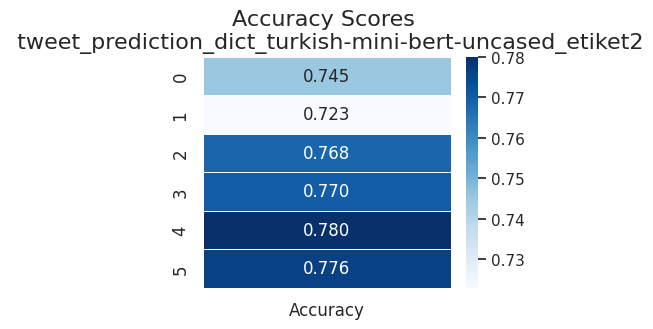

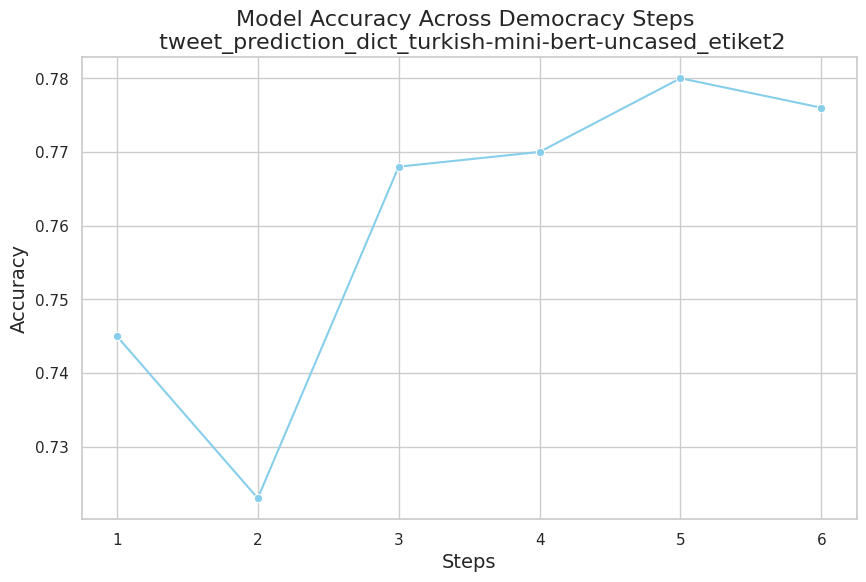

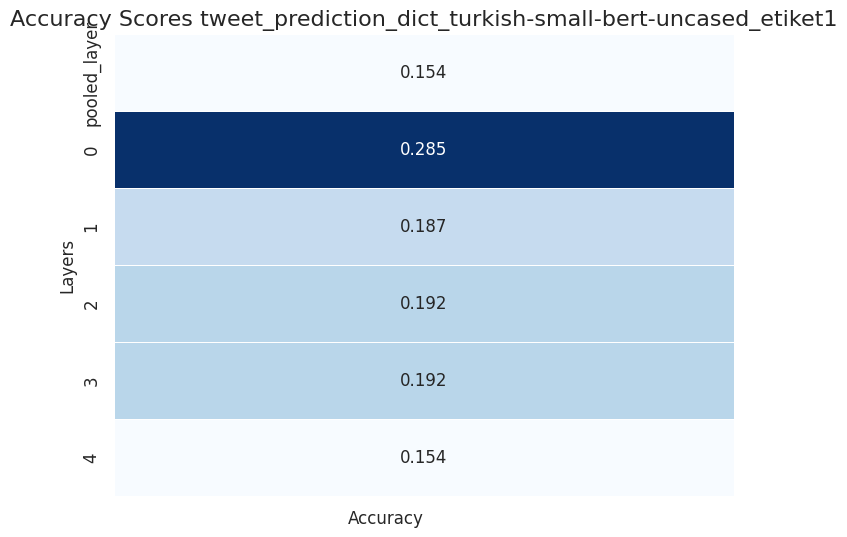

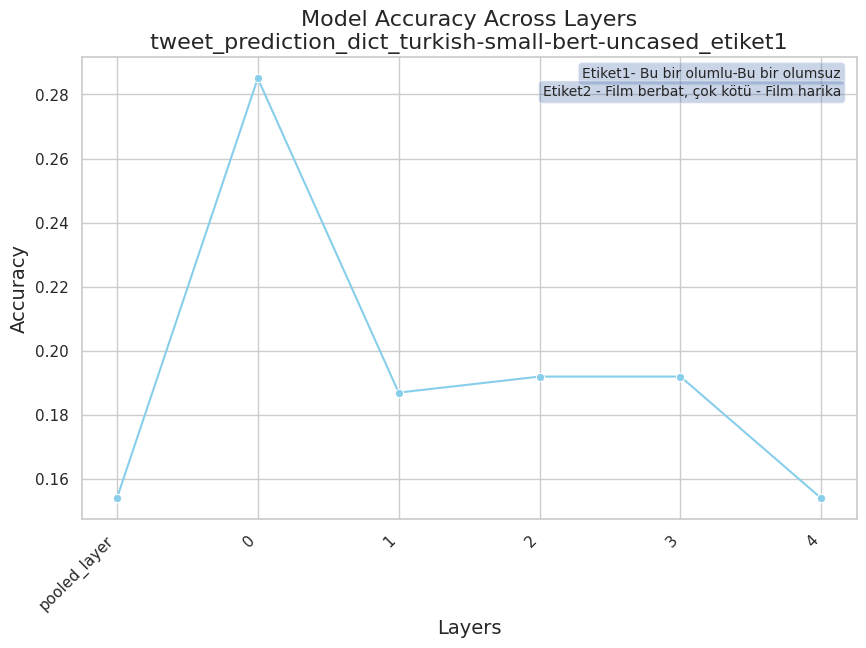

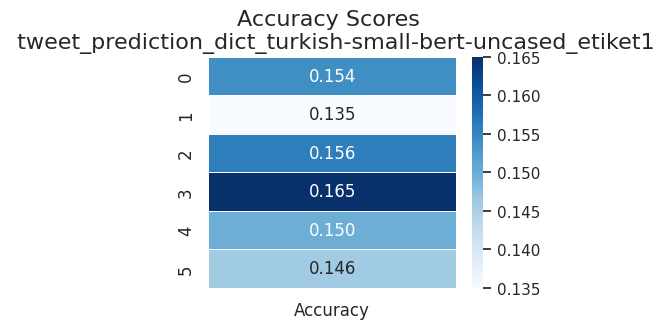

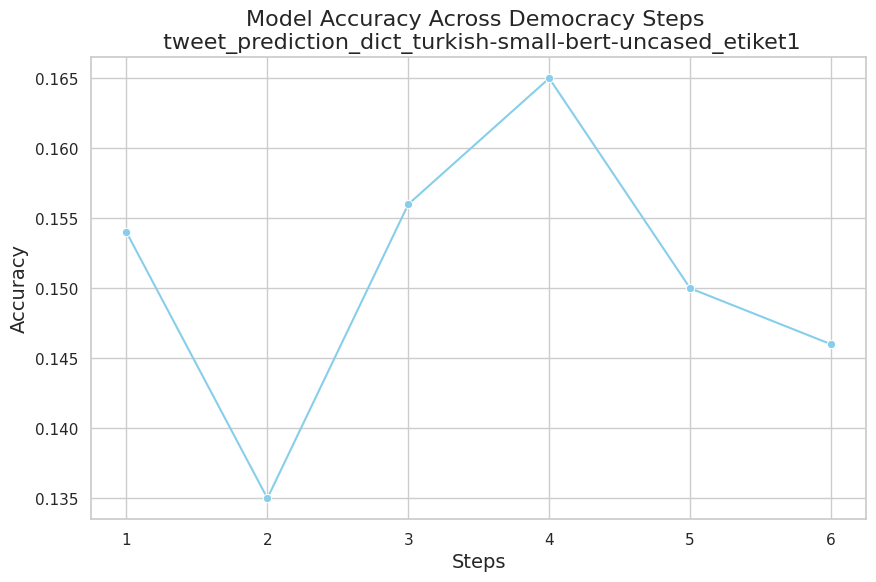

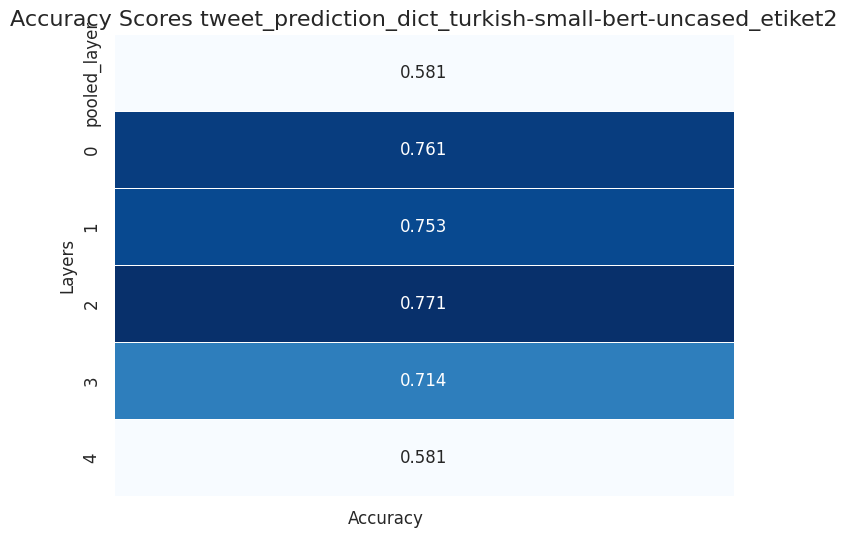

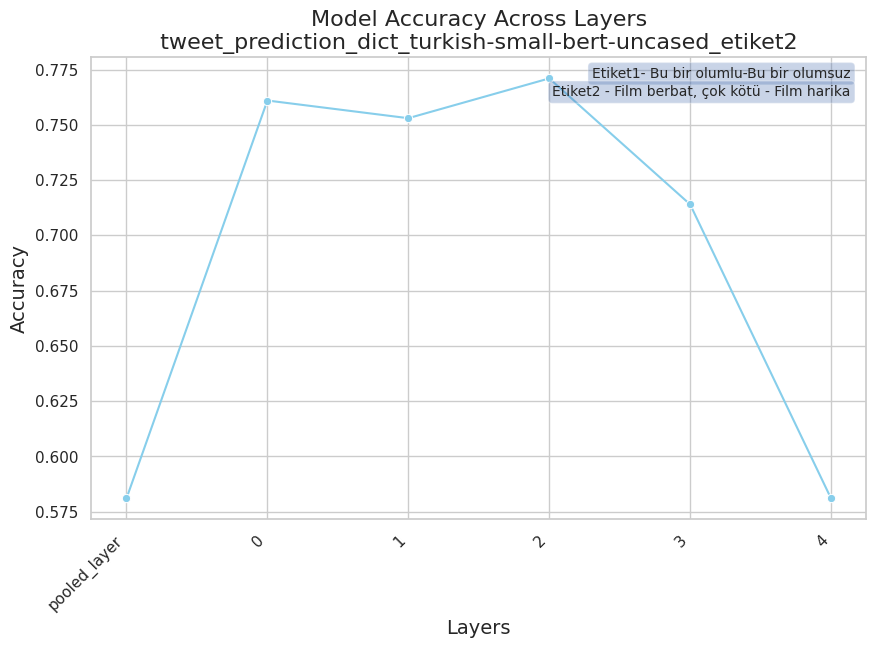

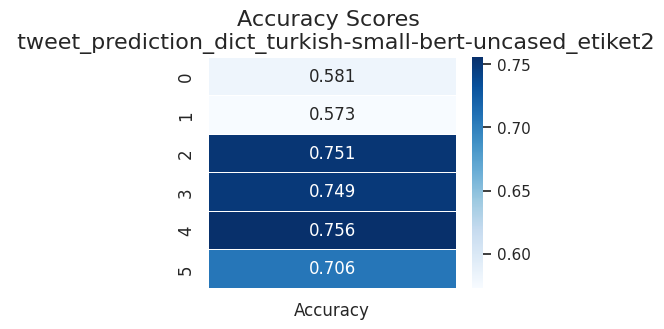

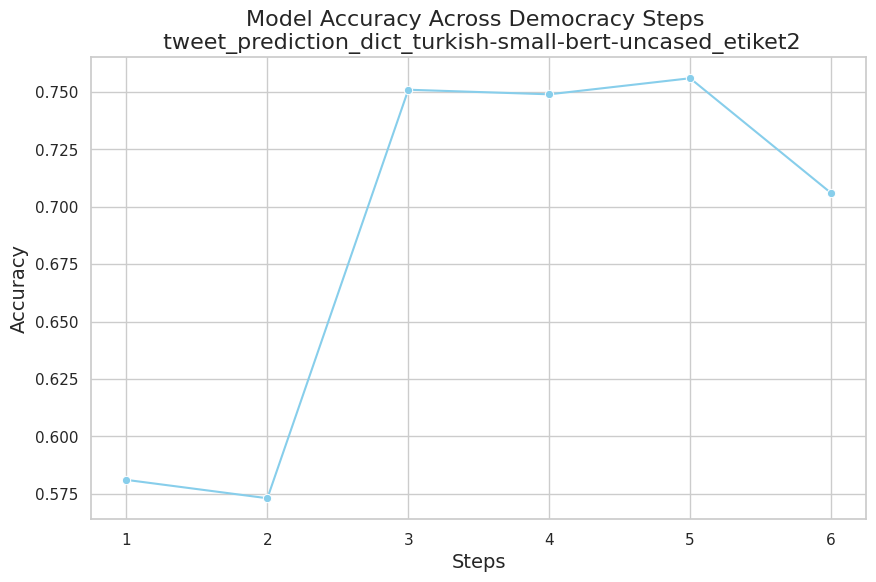

In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


for file in files:
    with open(file, 'rb') as f:
        film_predict  = pickle.load(f)

    file_name = file.split("/")[-1].split(".")[0]


    model_predicts=  {}
    accuracy_list= []
    for name, predict_list in film_predict.items():
        accuracy_score_1 =accuracy_score(labels_test, predict_list)
        accuracy_list.append(accuracy_score_1)
      #  print(f"Accuracy of BERT ({name}) is:",accuracy_score_1)

        from sklearn.metrics import classification_report
       # print(classification_report(labels_test, predict_list))
        model_predicts[name] = accuracy_score_1


    df = pd.DataFrame(list(model_predicts.items()), columns=['Layers', 'Accuracy'])

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.set_index('Layers'), annot=True, cmap='Blues', cbar=False, linewidths=.5,  fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores {file_name}', fontsize=16)
    plt.xticks(ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Extract keys (x-axis) and values (y-axis) from the dictionary
    steps = list(model_predicts.keys())
    accuracy = list(model_predicts.values())

    steps = [str(step) for step in steps]
    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Layers\n {file_name} ', fontsize=16)
    line_plot.set_xlabel('Layers', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Two labels inside the graph at the top-right corner
    note1 = 'Etiket1- Bu bir olumlu-Bu bir olumsuz'
    note2 = 'Etiket2 - Film berbat, çok kötü - Film harika'
    plt.text(0.98, 0.98, note1, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))
    plt.text(0.98, 0.94, note2, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))


    # Display the plot
    plt.show()


    predict_model_list = []
    accuracy_score_democracy= []
    for i in film_predict.values():
        predict_model_list.append(i)
        import scipy.stats
        result = scipy.stats.mode(np.stack(predict_model_list), axis=0)
        e_result=result.mode
        from sklearn.metrics import accuracy_score
        acc = accuracy_score(labels_test, e_result)
        accuracy_score_democracy.append(acc)
       # print("Accuracy of BERT(Bagging with Democracy method) is:",acc)

        from sklearn.metrics import classification_report
       # print(classification_report(labels_test, e_result))


    # Convert the list into a DataFrame
    df = pd.DataFrame({'Accuracy': accuracy_score_democracy})

    plt.figure(figsize=(4, 3))
    sns.heatmap(df, annot=True, cmap='Blues', cbar=True, linewidths=.5, fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores \n {file_name}', fontsize=16)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Create a list for steps based on the length of the accuracy list
    steps = list(range(1, len(accuracy_score_democracy) + 1))

    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy_score_democracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Democracy Steps \n {file_name}', fontsize=16)
    line_plot.set_xlabel('Steps', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Display the plot
    plt.show()




In [32]:
# demokrasi yöntemiyle her bir comment için modu alınarak en fazla tekrar edilen sonuç ensemble prediction olarak kaydedilip accuracy ölçülüyor.
import scipy.stats
result = scipy.stats.mode(np.stack(predict_model_list), axis=0)
e_result=result.mode
print(e_result)
from sklearn.metrics import accuracy_score
print("Accuracy of BERT(Bagging with Democracy method) is:",accuracy_score(labels_test, e_result))

from sklearn.metrics import classification_report
print(classification_report(labels_test, e_result))

[1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 0 0 

In [20]:
import numpy as np
import pandas as pd

#datasetleri yüklüyoruz
df_test = pd.read_csv("/content/drive/MyDrive/kolektif_proje/magaza_yorumlari.csv", encoding = "utf-16")

import torch
# cuda varsa gpu yoksa cpu kullanmak için cihazı ayarlayan kod hücresi
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


No GPU available, using the CPU instead.


In [21]:
encoded_labels = {'Olumlu': 0, 'Olumsuz': 1}
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test['Durum'] = label_encoder.fit_transform(df_test['Durum'])

In [22]:

#test veri seti için zero-shot a sokulmak üzere metin ve etiketlerin alınması ardından ilk 1000inin alınması
comments = df_test.Görüş.values

labels_test = df_test.Durum.values

comments = comments[:1000]
labels_test = labels_test[:1000]

In [23]:
files = [
    "/content/drive/MyDrive/magaza_prediction_dict_bert-base-turkish-cased_etiket2.pickle",
    "/content/drive/MyDrive/magaza_prediction_dict_turkish-medium-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/magaza_prediction_dict_turkish-mini-bert-uncased_etiket2.pickle",
    "/content/drive/MyDrive/magaza_prediction_dict_turkish-small-bert-uncased_etiket2.pickle",
]

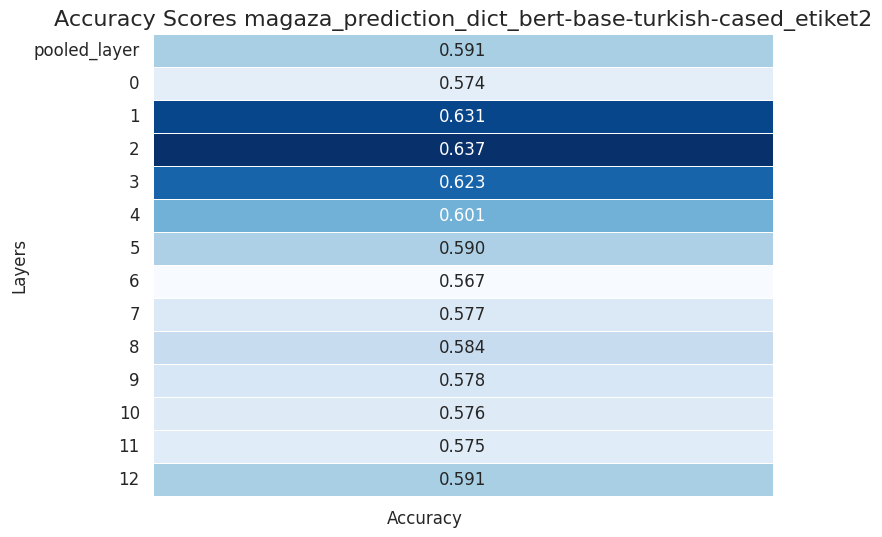

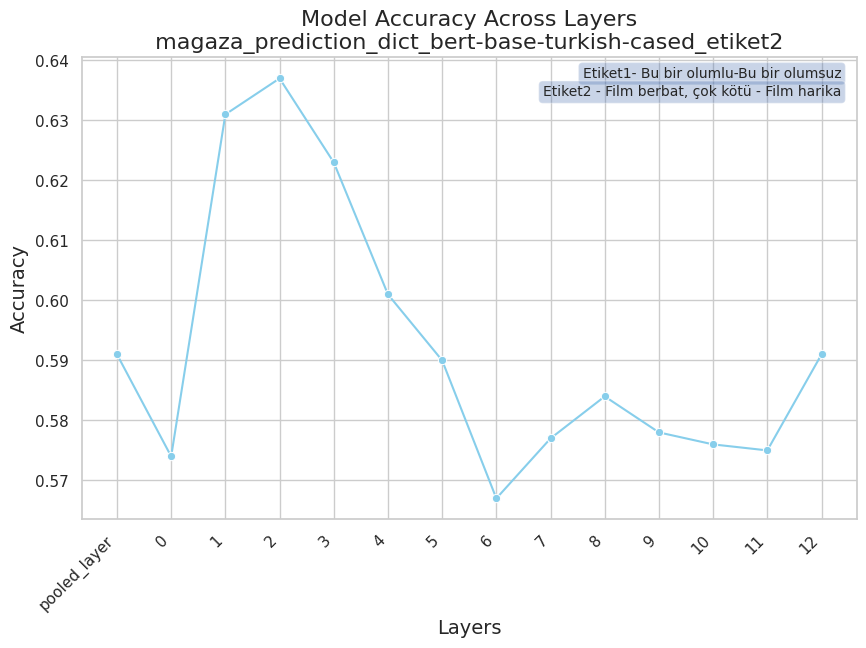

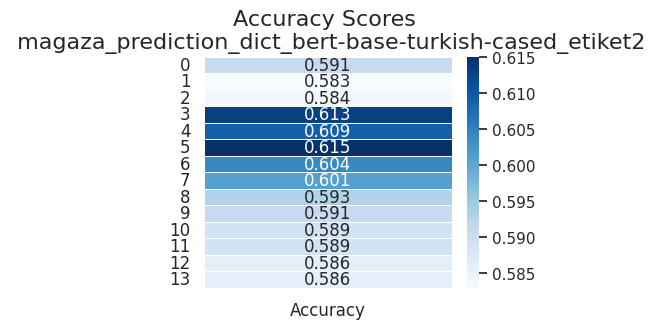

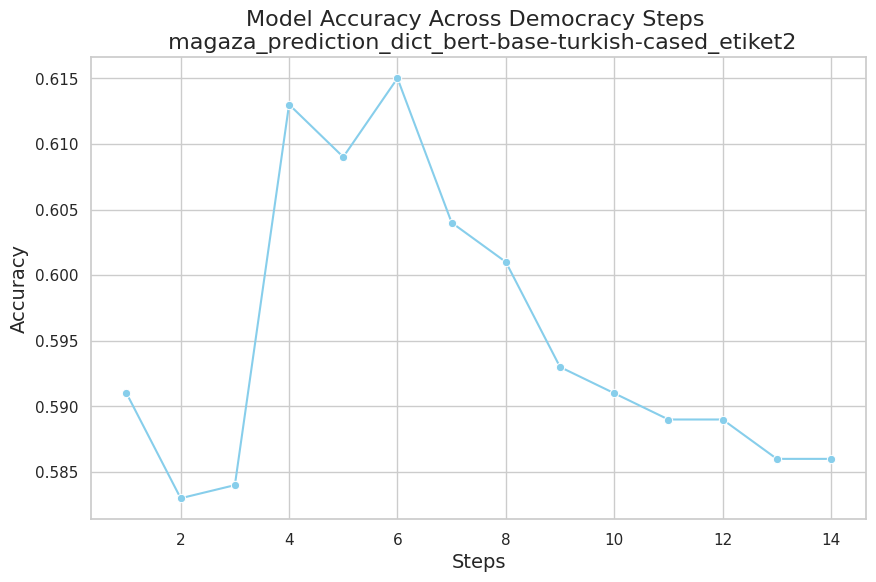

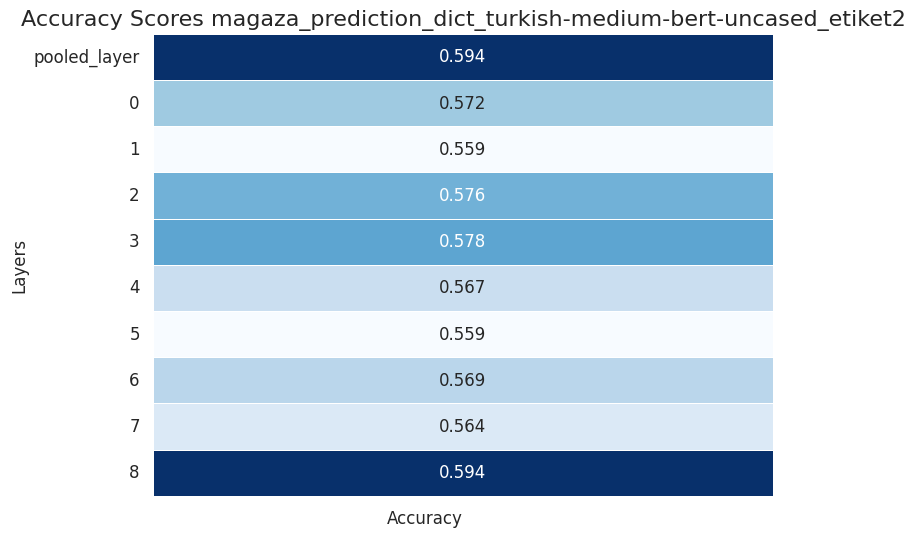

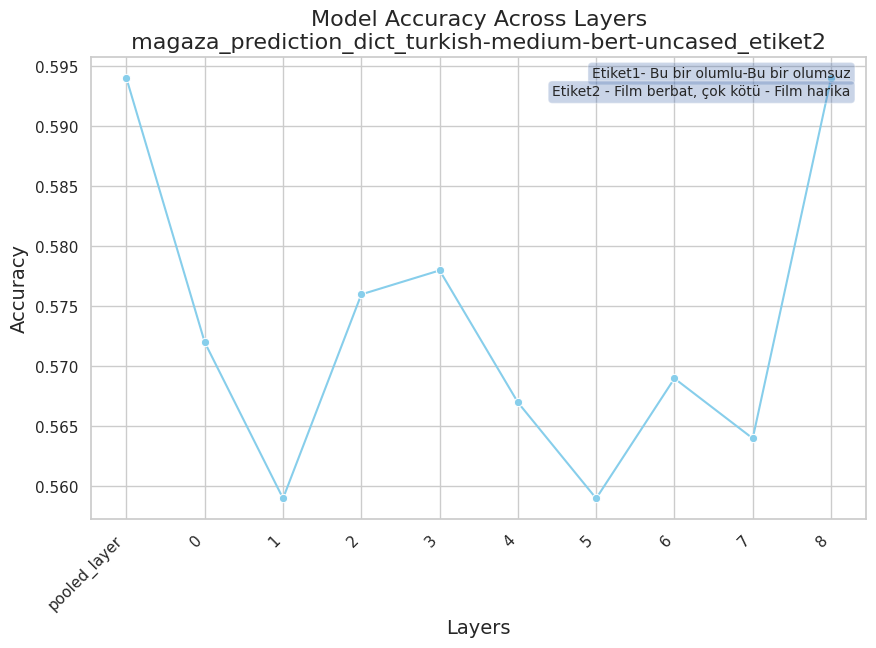

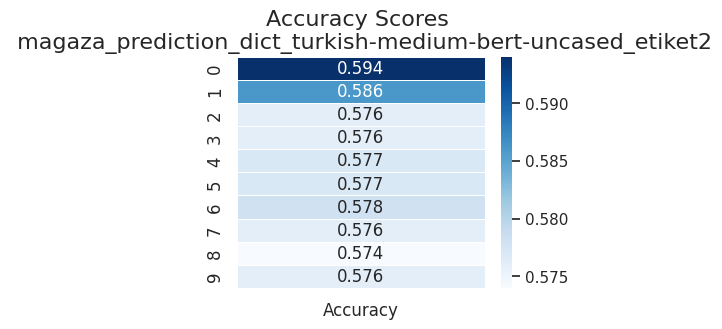

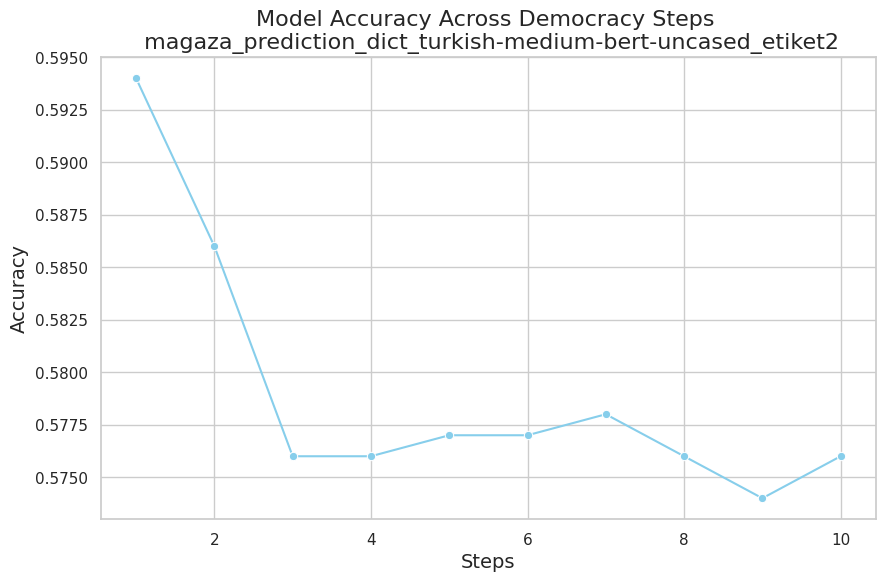

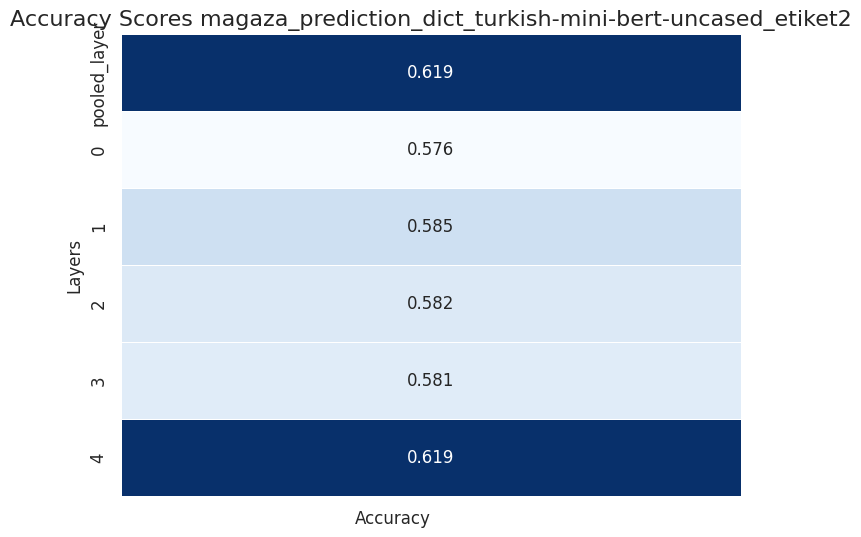

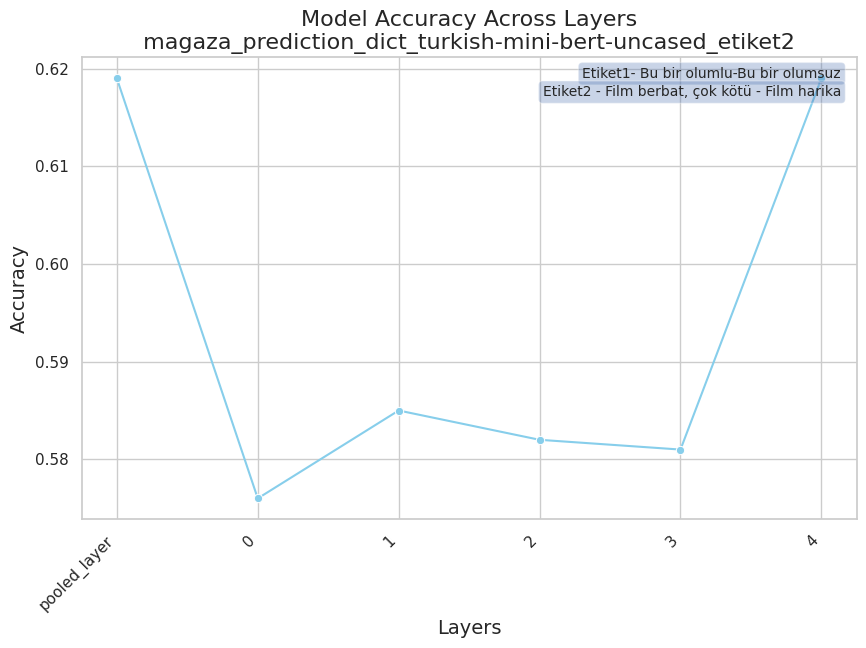

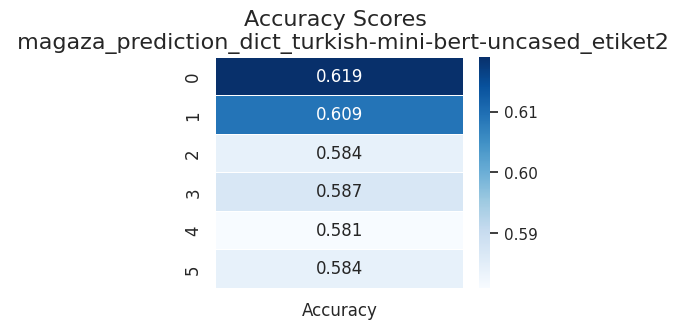

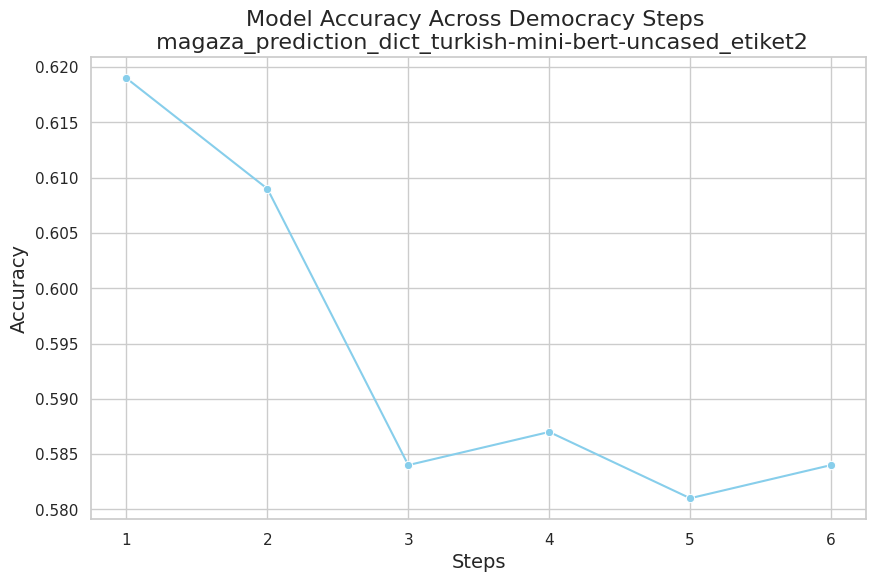

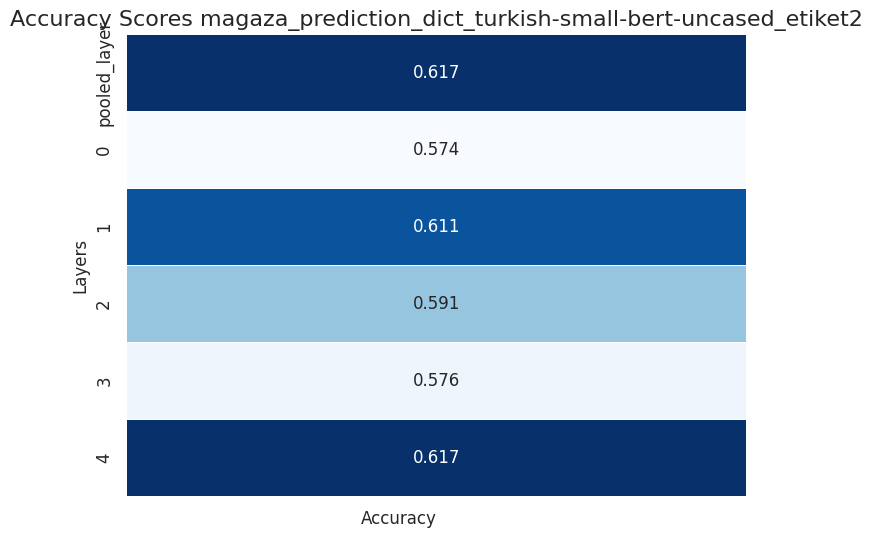

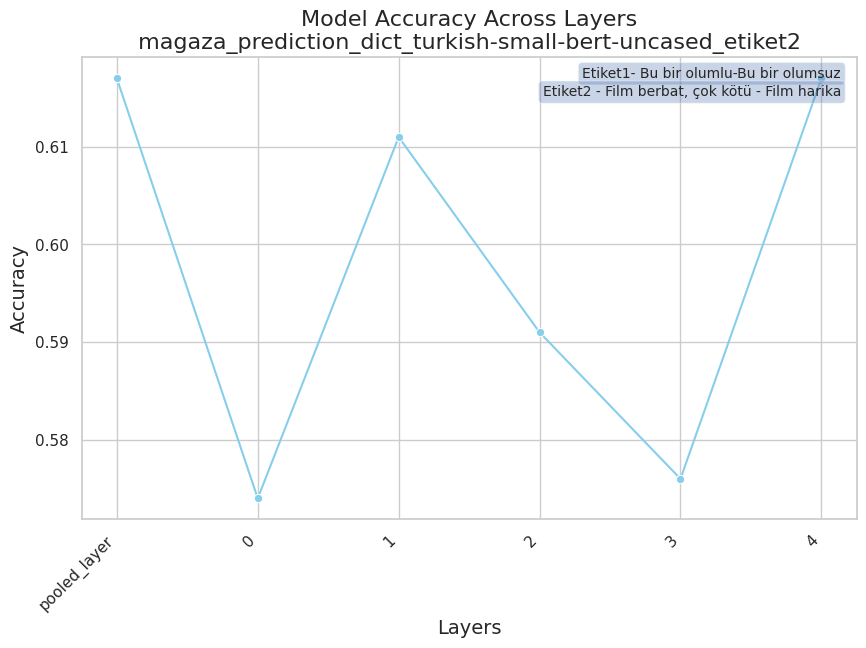

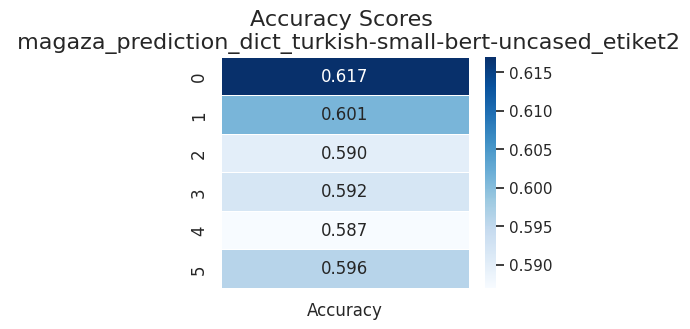

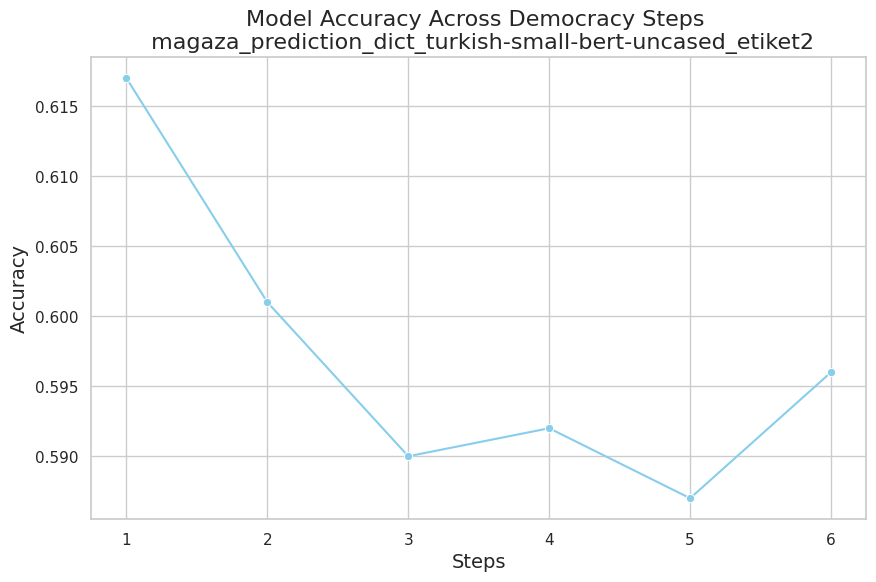

In [24]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


for file in files:
    with open(file, 'rb') as f:
        film_predict  = pickle.load(f)

    file_name = file.split("/")[-1].split(".")[0]


    model_predicts=  {}
    accuracy_list= []
    for name, predict_list in film_predict.items():
        accuracy_score_1 =accuracy_score(labels_test, predict_list)
        accuracy_list.append(accuracy_score_1)
      #  print(f"Accuracy of BERT ({name}) is:",accuracy_score_1)

        from sklearn.metrics import classification_report
       # print(classification_report(labels_test, predict_list))
        model_predicts[name] = accuracy_score_1


    df = pd.DataFrame(list(model_predicts.items()), columns=['Layers', 'Accuracy'])

    # Create a heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.set_index('Layers'), annot=True, cmap='Blues', cbar=False, linewidths=.5,  fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores {file_name}', fontsize=16)
    plt.xticks(ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Extract keys (x-axis) and values (y-axis) from the dictionary
    steps = list(model_predicts.keys())
    accuracy = list(model_predicts.values())

    steps = [str(step) for step in steps]
    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Layers\n {file_name} ', fontsize=16)
    line_plot.set_xlabel('Layers', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Two labels inside the graph at the top-right corner
    note1 = 'Etiket1- Bu bir olumlu-Bu bir olumsuz'
    note2 = 'Etiket2 - Film berbat, çok kötü - Film harika'
    plt.text(0.98, 0.98, note1, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))
    plt.text(0.98, 0.94, note2, fontsize=10, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round', alpha=0.3))


    # Display the plot
    plt.show()


    predict_model_list = []
    accuracy_score_democracy= []
    for i in film_predict.values():
        predict_model_list.append(i)
        import scipy.stats
        result = scipy.stats.mode(np.stack(predict_model_list), axis=0)
        e_result=result.mode
        from sklearn.metrics import accuracy_score
        acc = accuracy_score(labels_test, e_result)
        accuracy_score_democracy.append(acc)
       # print("Accuracy of BERT(Bagging with Democracy method) is:",acc)

        from sklearn.metrics import classification_report
       # print(classification_report(labels_test, e_result))


    # Convert the list into a DataFrame
    df = pd.DataFrame({'Accuracy': accuracy_score_democracy})

    plt.figure(figsize=(4, 3))
    sns.heatmap(df, annot=True, cmap='Blues', cbar=True, linewidths=.5, fmt='.3f')

    # Adding some style
    plt.title(f'Accuracy Scores \n {file_name}', fontsize=16)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)

    # Display the plot
    plt.show()

    # Create a list for steps based on the length of the accuracy list
    steps = list(range(1, len(accuracy_score_democracy) + 1))

    # Set the style for a more fashionable look
    sns.set_theme(style="whitegrid")

    # Create a line plot using Seaborn
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(x=steps, y=accuracy_score_democracy, marker='o', color='skyblue')

    # Adding some style
    line_plot.set_title(f'Model Accuracy Across Democracy Steps \n {file_name}', fontsize=16)
    line_plot.set_xlabel('Steps', fontsize=14)
    line_plot.set_ylabel('Accuracy', fontsize=14)

    # Display the plot
    plt.show()


